# Future Weather Forcasting

Problem Statement: 

The aim of this project is to develop a predictive model for weather forecasting that can provide accurate weather information for the next few days. The model will use historical weather data along with other relevant factors such as wind direction, humidity, and precipitation to predict the weather conditions.

The predicted weather information can be used by various businesses such as transportation, agriculture, tourism, and outdoor events planning to make informed decisions. For example, transportation companies can use weather forecasts to plan their routes and schedules accordingly. Farmers can use weather forecasts to make decisions about planting and harvesting crops. Tourism and outdoor event planners can use weather forecasts to plan their events and activities.

The predictive model will be developed using machine learning techniques such as clustering, classification, collaborative filtering, and market basket analysis. The model will be trained and tested using historical weather data and evaluated based on accuracy and precision. The aim is to develop a model that provides accurate weather forecasts for various regions and can be easily integrated into different applications.

## Importing Requred Libraries And Packages

In [ ]:
import numpy as np  
import pandas as pd 
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import os
from sklearn.preprocessing import MinMaxScaler
from prophet import Prophet
from prophet.plot import add_changepoints_to_plot, plot_plotly, plot_components_plotly
import warnings
import plotly.graph_objects as go
import plotly.express as px
warnings.filterwarnings("ignore")
sns.set_theme()

## Importing Dataset

In [ ]:
df = pd.read_excel('Weather_data.xlsx')

In [ ]:
df.head()

Year  Month  Day  Temperature_Max  Temperature_Min  Precipitation  \
0  1981      1    1            24.68            12.73            0.0   
1  1981      1    2            24.05            14.08            0.0   
2  1981      1    3            23.69            13.35            0.0   
3  1981      1    4            24.32            13.90            0.0   
4  1981      1    5            24.44            14.44            0.0   

   Humidity  Wind_Speed_Max  Wind_Speed_Min  Wind_Speed_Range  Wind_DIrection  
0      8.48            5.12            2.68              2.45          179.69  
1      7.81            3.63            1.89              1.75          187.94  
2      7.81            3.38            0.77              2.61          184.81  
3      7.81            3.23            0.44              2.80          193.38  
4      9.52            3.53            1.01              2.53          187.00

In [ ]:
df.isnull().any()

Year                False
Month               False
Day                 False
Temperature_Max     False
Temperature_Min     False
Precipitation       False
Humidity            False
Wind_Speed_Max      False
Wind_Speed_Min      False
Wind_Speed_Range    False
Wind_DIrection      False
dtype: bool

In [ ]:
# cols = df.columns.difference(['Temperature Max', 'Temperature Min', 'Precipitation', 'Humidity', 'Wind Speed Max', 'Wind Speed Min', 'Wind Speed Range', 'Wind DIrection'])
# df['Date'] = df[cols].apply(lambda x: '-'.join(x.dropna().astype(int).astype(str)), 1)
# df = df.drop(cols, axis=1)

## Preprocessing Dataset

In [ ]:
df['Date'] = df[['Year', 'Month', 'Day']].astype(str).agg('-'.join, axis=1)
df = df.drop(df[['Year', 'Month', 'Day']], axis=1)
df

Temperature_Max  Temperature_Min  Precipitation  Humidity  \
0                24.68            12.73            0.0      8.48   
1                24.05            14.08            0.0      7.81   
2                23.69            13.35            0.0      7.81   
3                24.32            13.90            0.0      7.81   
4                24.44            14.44            0.0      9.52   
...                ...              ...            ...       ...   
14970            24.18            13.95            0.0      9.95   
14971            24.11            13.77            0.0      9.70   
14972            24.04            13.95            0.0      9.34   
14973            26.97            15.18            0.0      9.16   
14974            24.60            13.95            0.0     10.50   

       Wind_Speed_Max  Wind_Speed_Min  Wind_Speed_Range  Wind_DIrection  \
0                5.12            2.68              2.45          179.69   
1                3.63            1.89              1.75          187.94   
2                3.38            0.77              2.61          184.81   
3                3.23            0.44              2.80          193.38   
4                3.53            1.01              2.53          187.00   
...               ...             ...               ...             ...   
14970            4.73            0.77              3.95          141.75   
14971            4.21            1.82              2.38           77.81   
14972            3.66            1.04              2.62          155.25   
14973            4.85            0.27              4.59          148.12   
14974            5.15            3.20              1.95          136.88   

             Date  
0        1981-1-1  
1        1981-1-2  
2        1981-1-3  
3        1981-1-4  
4        1981-1-5  
...           ...  
14970  2021-12-27  
14971  2021-12-28  
14972  2021-12-29  
14973  2021-12-30  
14974  2021-12-31  

[14975 rows x 9 columns]

## Dataset Visualization

### Data Frequency


array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >], dtype=object)

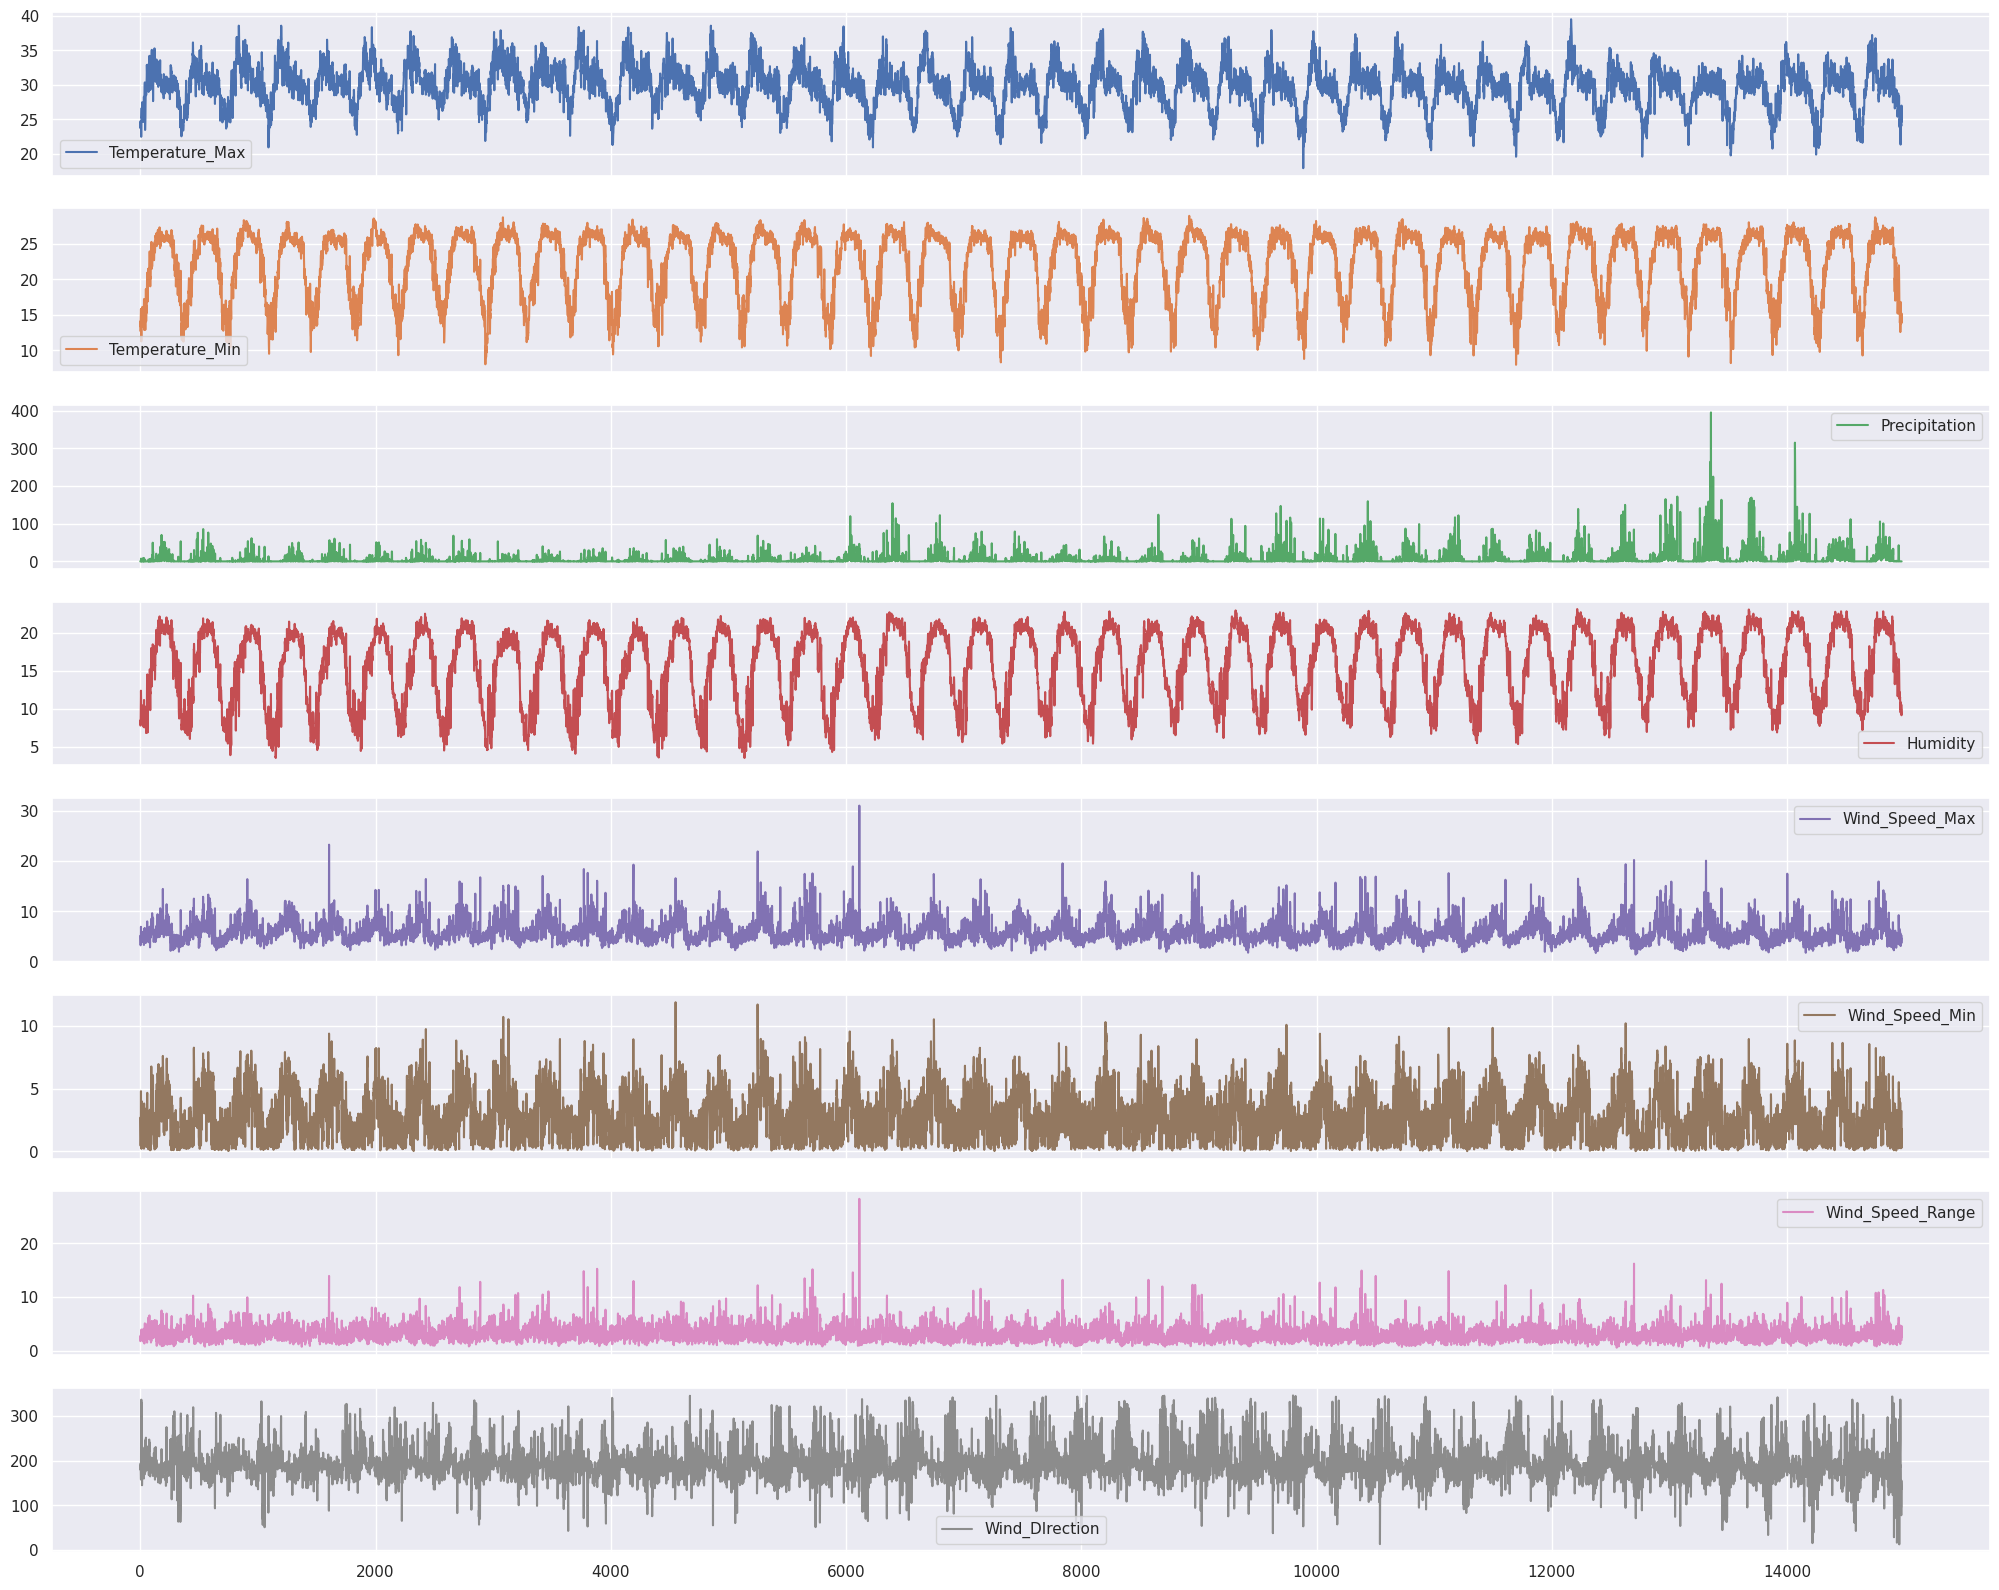

In [ ]:
df.plot(subplots=True, figsize=(25,20))

### Data Heatmap


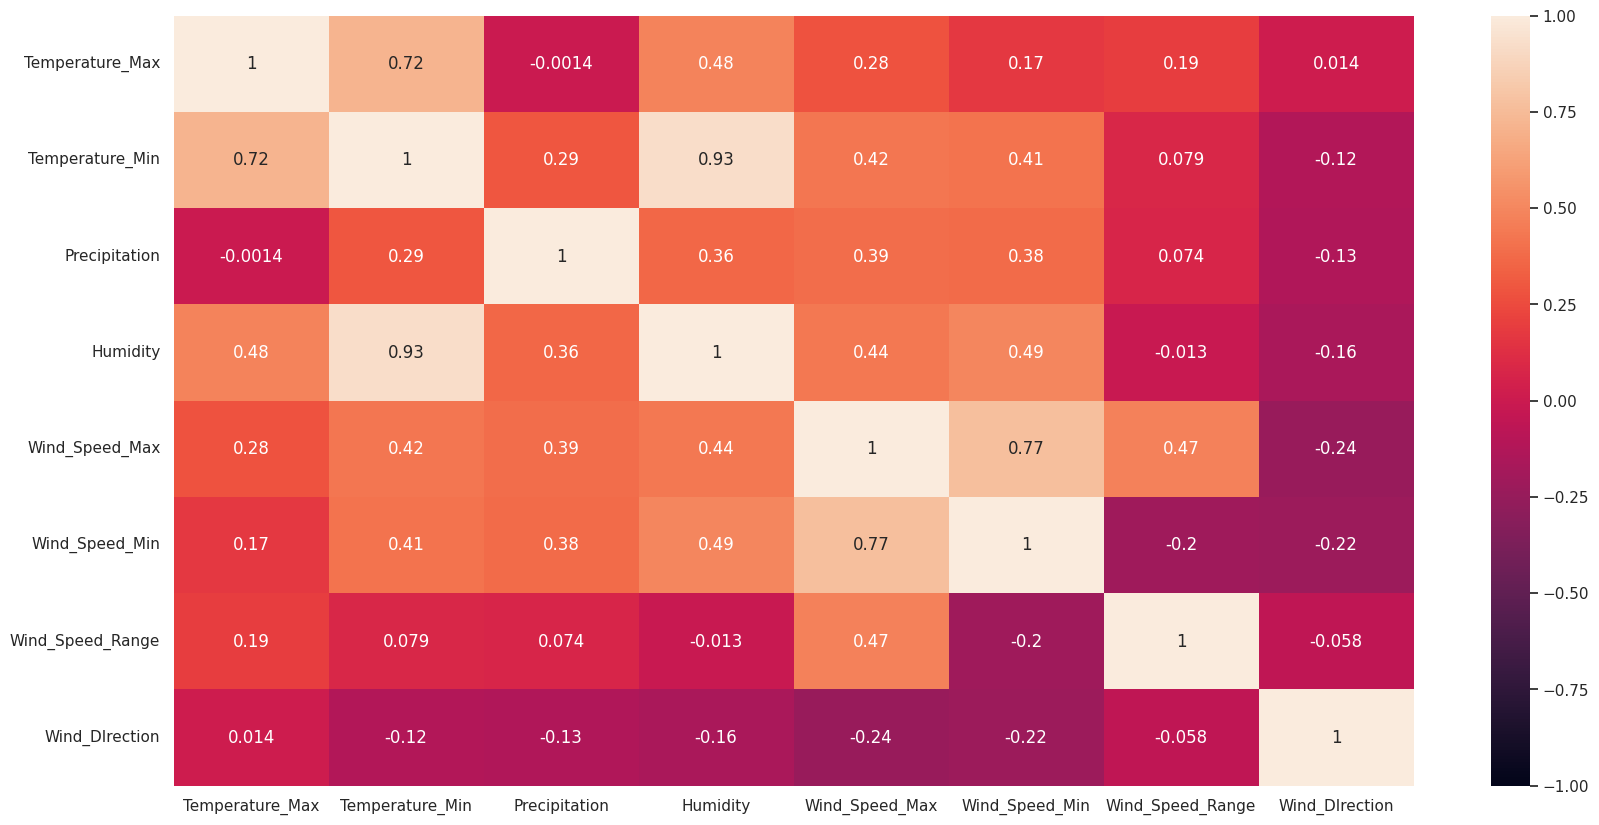

In [ ]:
plt.figure(figsize=(20,10))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)

### alternative

In [ ]:
# plt.figure(figsize=(18,8)) # this creates a figure 8 inch wide, 4 inch high
# ax = sns.countplot(x=df['Temperature Max'])
# ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
# plt.tight_layout()
# plt.show()

In [ ]:
# plt.figure(figsize=(18,8)) # this creates a figure 8 inch wide, 4 inch high
# ax = sns.countplot(x=df['Temperature Min'])
# ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
# plt.tight_layout()
# plt.show()

### Histogram

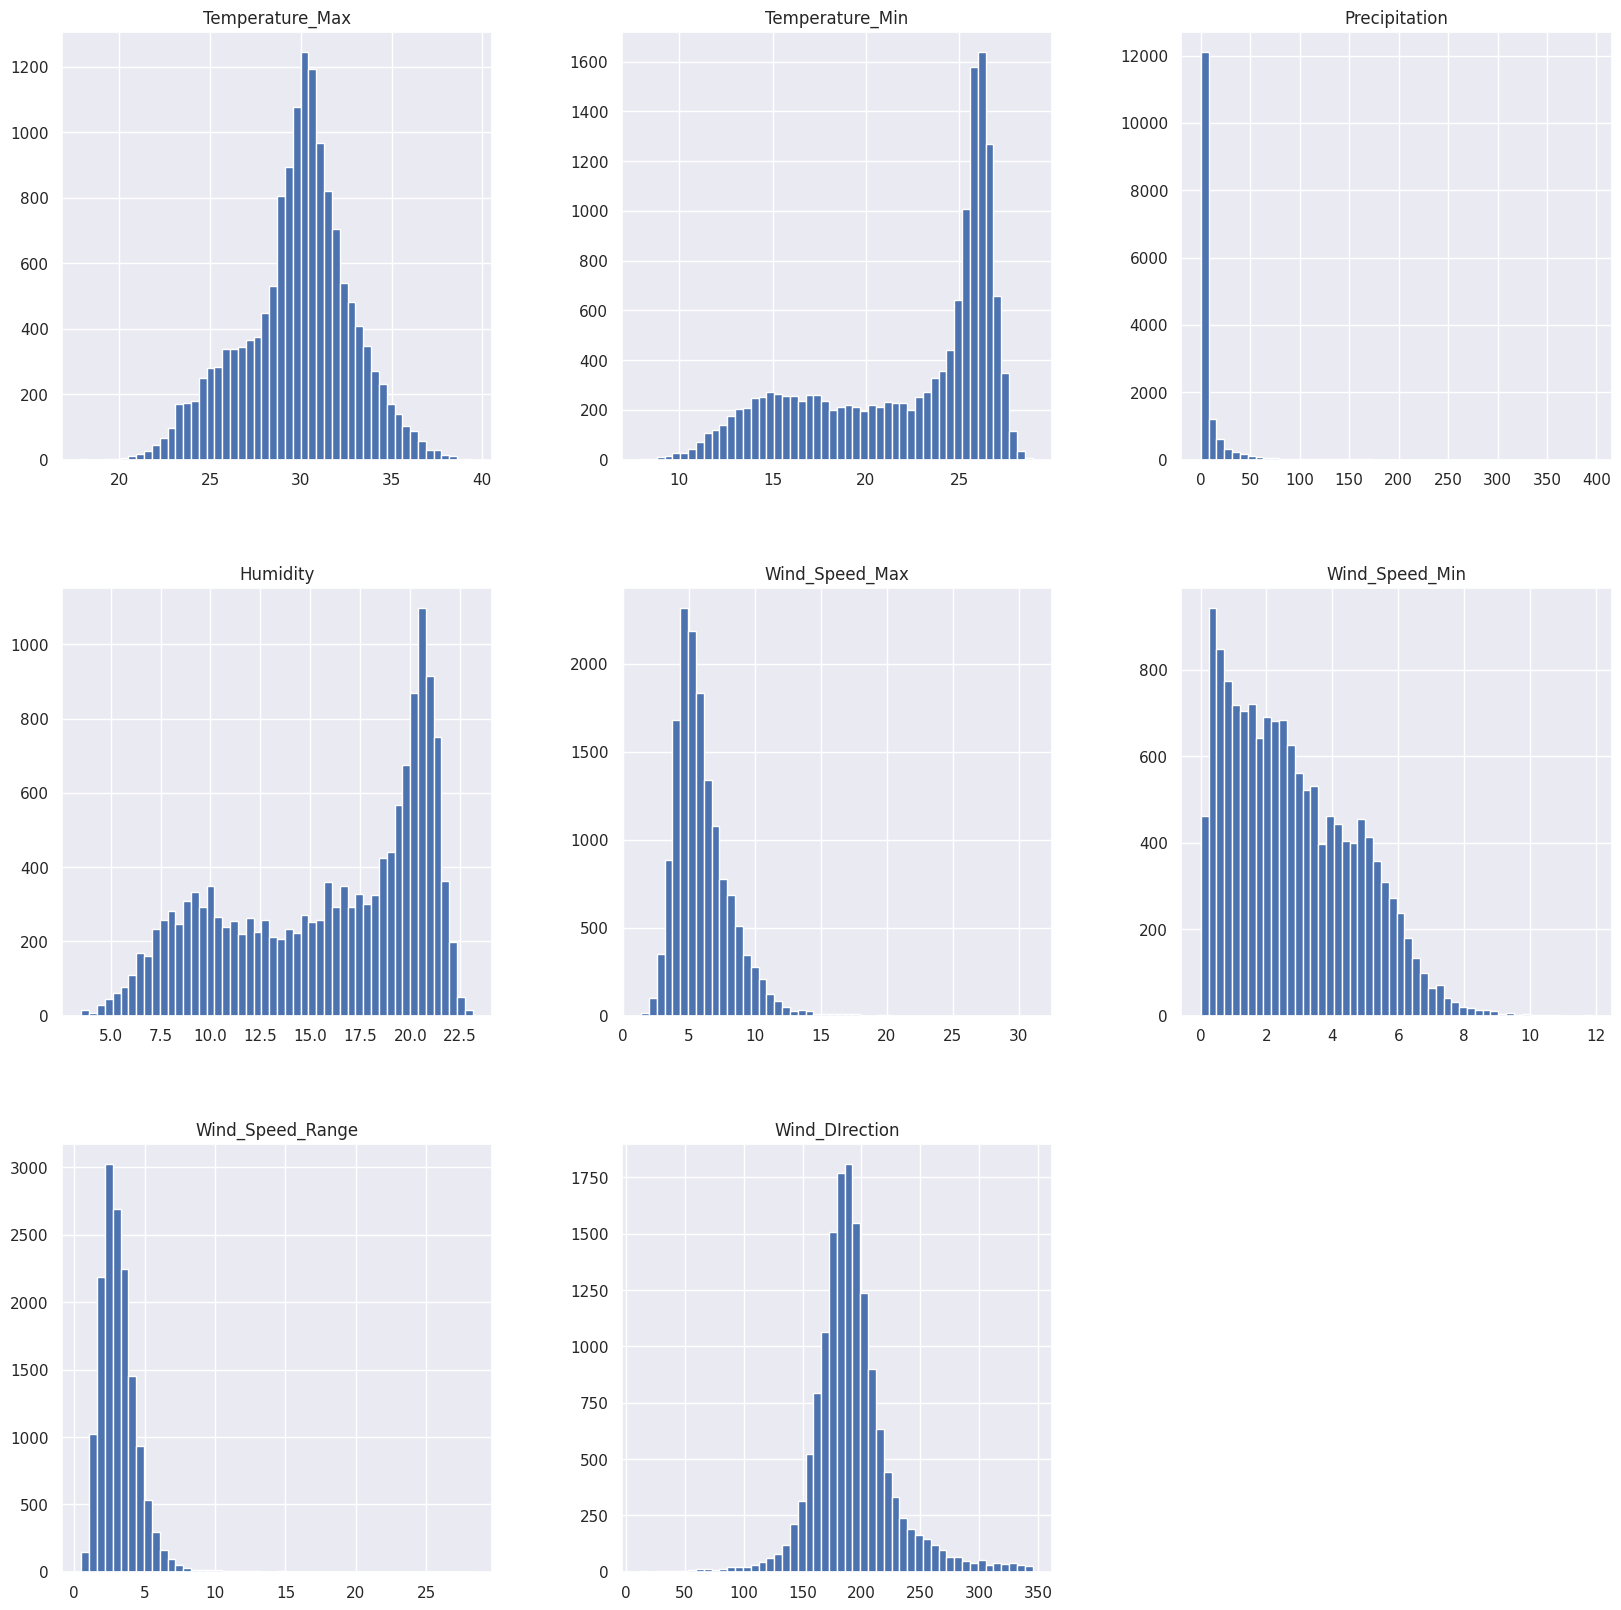

In [ ]:
df.hist(bins=50, figsize=(20, 20))
plt.show()

## Prediction model


### Evaluations

> *Evaluations of Parameters such as (**Temperature Max, Temperature Min, Precipitation, Humidity, Wind Speed Max, Wind Speed Min, Wind DIrection**)*

> How many days would you want to predict?

In [ ]:
days = int(10227)
predicted_data = pd.DataFrame()  

#### 1 **Humidity**

> 1.1 Model Creation

In [ ]:
model1 = Prophet()

> 1.2 Data preprocessing

In [ ]:
df_for_humidity=df[['Date','Humidity']]
df_for_humidity['Date']=pd.to_datetime(df_for_humidity['Date'])
df_for_humidity.rename(columns = {'Date':'ds'}, inplace = True)
df_for_humidity.rename(columns = {'Humidity':'y'}, inplace = True)
model1.fit(df_for_humidity)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpm2cymma5/dp887ava.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpm2cymma5/_y2mmi7f.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=90525', 'data', 'file=/tmp/tmpm2cymma5/dp887ava.json', 'init=/tmp/tmpm2cymma5/_y2mmi7f.json', 'output', 'file=/tmp/tmpm2cymma5/prophet_model9o_8sg5a/prophet_model-20230430103902.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:39:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:39:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


> 1.3 Generate future Dates

In [ ]:
future = model1.make_future_dataframe(periods = days)
future.tail(5)

ds
25197 2049-12-27
25198 2049-12-28
25199 2049-12-29
25200 2049-12-30
25201 2049-12-31

> 1.4 predict future Humidity

In [ ]:
forecast = model1.predict(future)
predicted_data['Date'] = forecast['ds']
predicted_data['Humidity'] = forecast['yhat']
# forecast = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds       yhat  yhat_lower  yhat_upper
25197 2049-12-27  11.779307    5.604931   18.062750
25198 2049-12-28  11.715310    5.397227   17.970453
25199 2049-12-29  11.661228    5.251061   17.909045
25200 2049-12-30  11.584426    5.283077   17.744509
25201 2049-12-31  11.528153    5.381963   17.695859

> 1.5 Visusalization (past and future)

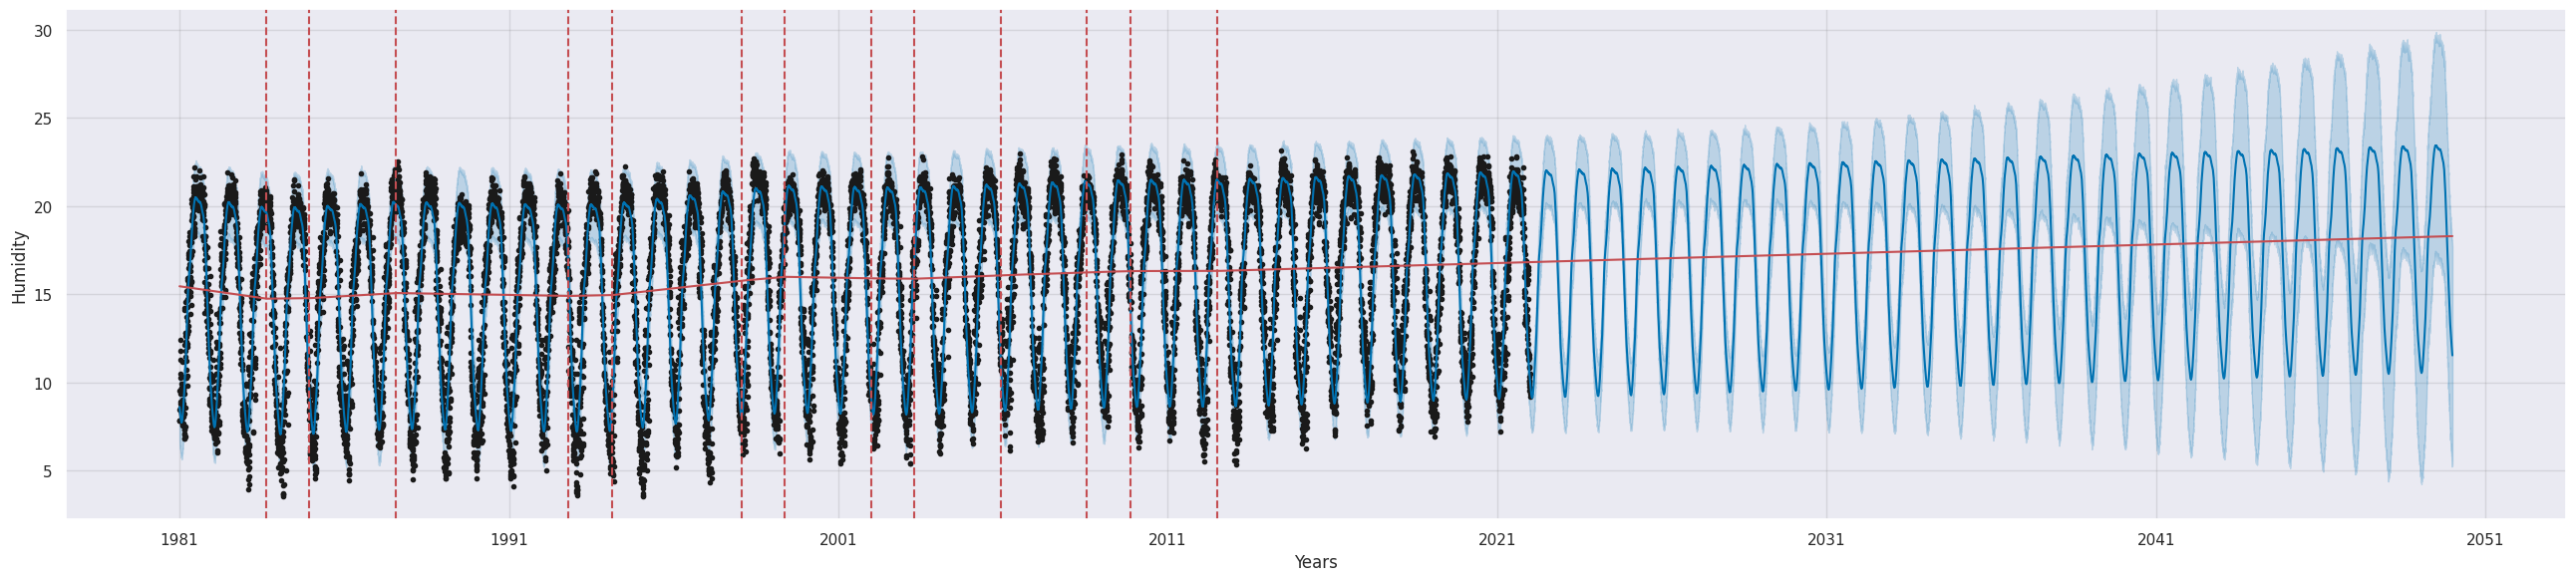

In [ ]:
fig = model1.plot(forecast,figsize=(26, 6))
# fig = m.plot(forecast,figsize=(20, 12))
a = add_changepoints_to_plot(fig.gca(), model1, forecast)
plt.xlabel('Years')
plt.ylabel('Humidity')
plt.tight_layout()
plt.show()

> 1.6 Visusalization of Trend, Yearly & Day

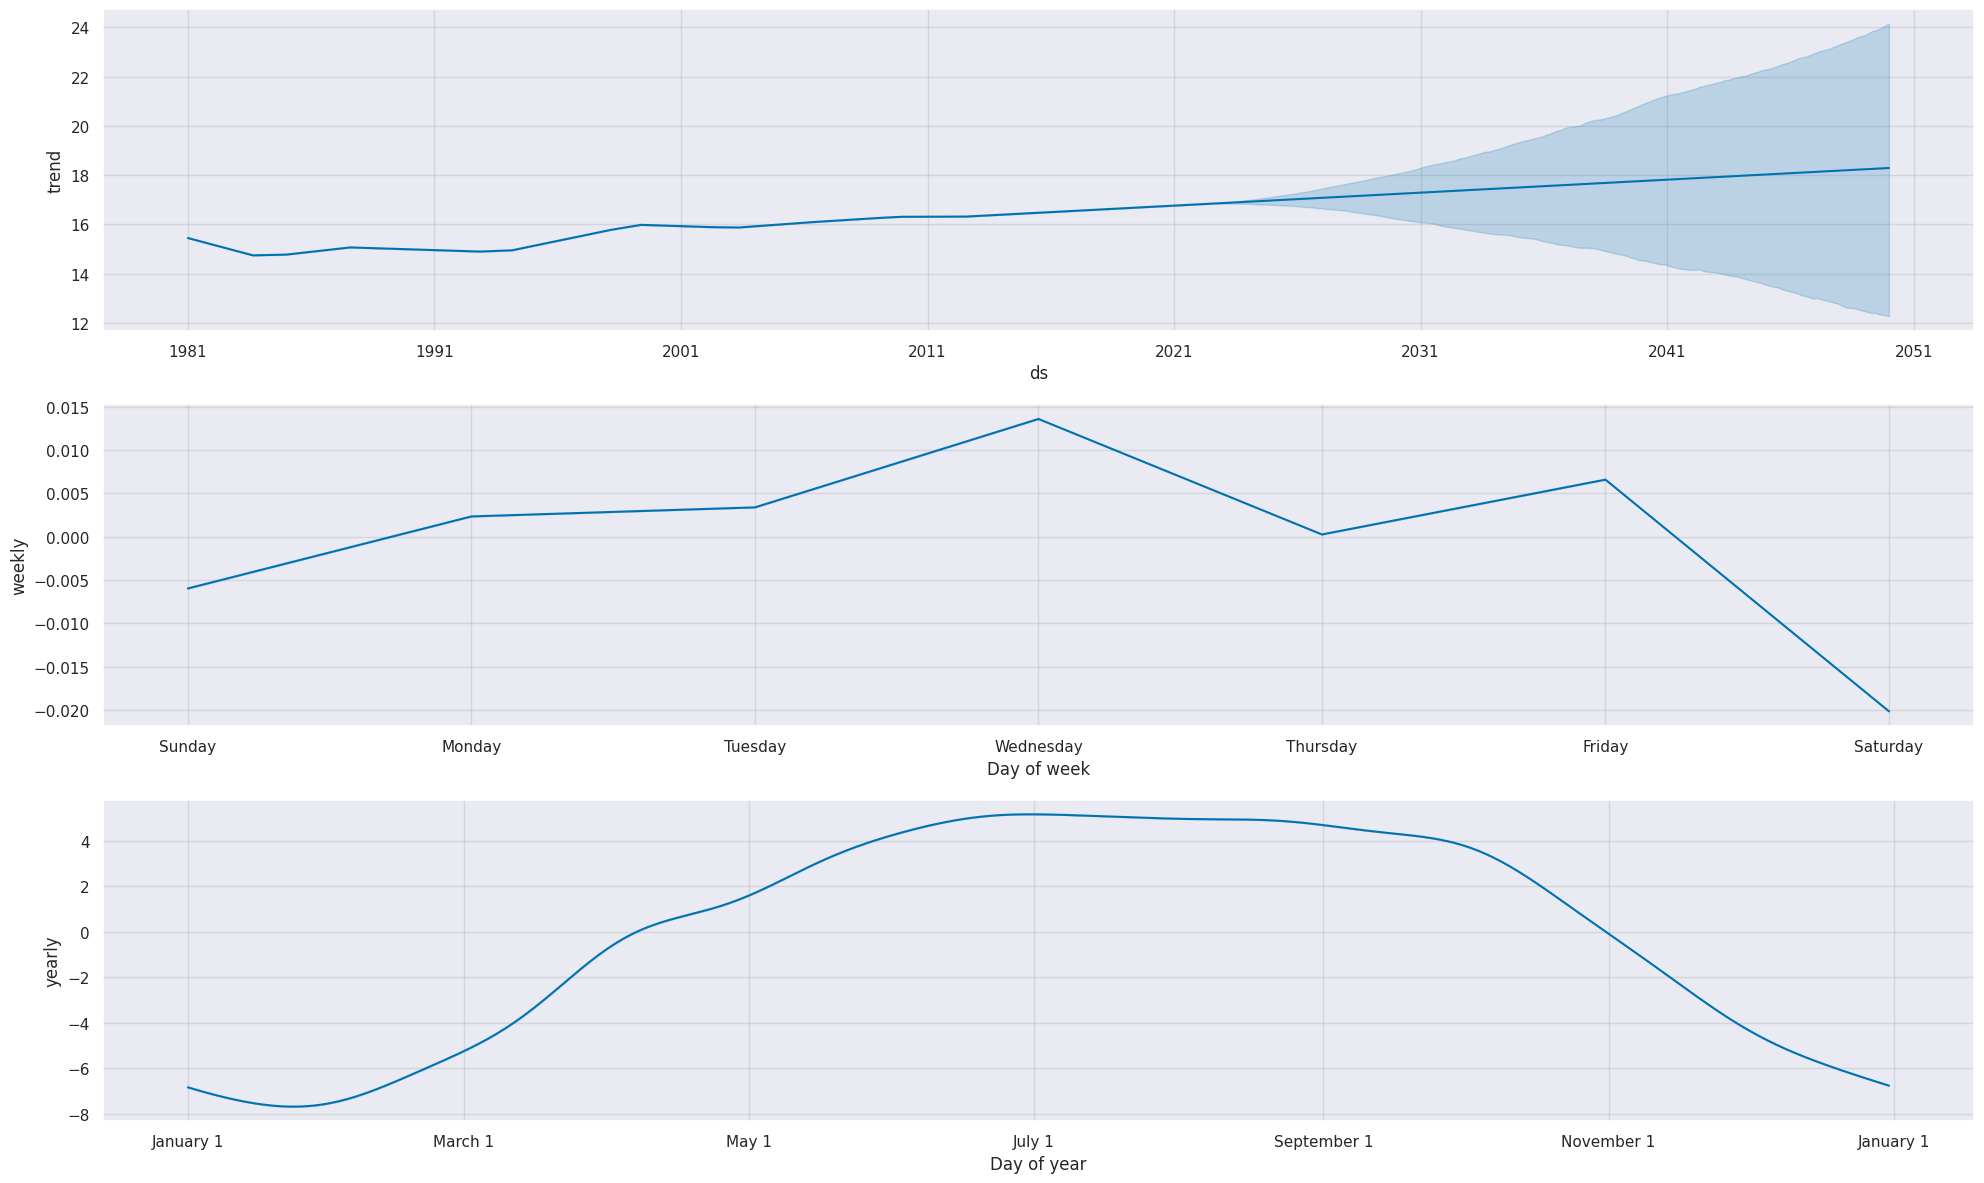

In [ ]:
fig = model1.plot_components(forecast, figsize=(20, 12))

#### 2 **Max Temperature**

> 2.1 Model Creation

In [ ]:
model2 = Prophet()

> 2.2 Data preprocessing

In [ ]:
df_for_temp_max=df[['Date','Temperature_Max']]
df_for_temp_max['Date']=pd.to_datetime(df_for_temp_max['Date'])
df_for_temp_max.rename(columns = {'Date':'ds'}, inplace = True)
df_for_temp_max.rename(columns = {'Temperature_Max':'y'}, inplace = True)
model2.fit(df_for_temp_max)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpm2cymma5/xrd_wmx5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpm2cymma5/6h8_8qrb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=76339', 'data', 'file=/tmp/tmpm2cymma5/xrd_wmx5.json', 'init=/tmp/tmpm2cymma5/6h8_8qrb.json', 'output', 'file=/tmp/tmpm2cymma5/prophet_model7c9xstoh/prophet_model-20230430103927.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:39:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:39:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


> 2.3 Generate future Dates

In [ ]:
# 2022 - 2050 : 10226 days
future = model2.make_future_dataframe(periods = days)
future.tail(5)

ds
25197 2049-12-27
25198 2049-12-28
25199 2049-12-29
25200 2049-12-30
25201 2049-12-31

> 2.4 predict future Humidity

In [ ]:
forecast = model2.predict(future)
predicted_data['Max_Temp'] = forecast['yhat']
# forecast = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds       yhat  yhat_lower  yhat_upper
25197 2049-12-27  23.729710   14.794653   34.786778
25198 2049-12-28  23.669198   14.464778   33.722163
25199 2049-12-29  23.630000   14.265422   33.842642
25200 2049-12-30  23.630551   14.415199   33.948135
25201 2049-12-31  23.613990   14.109191   34.328846

> 2.5 Visusalization (past and future)

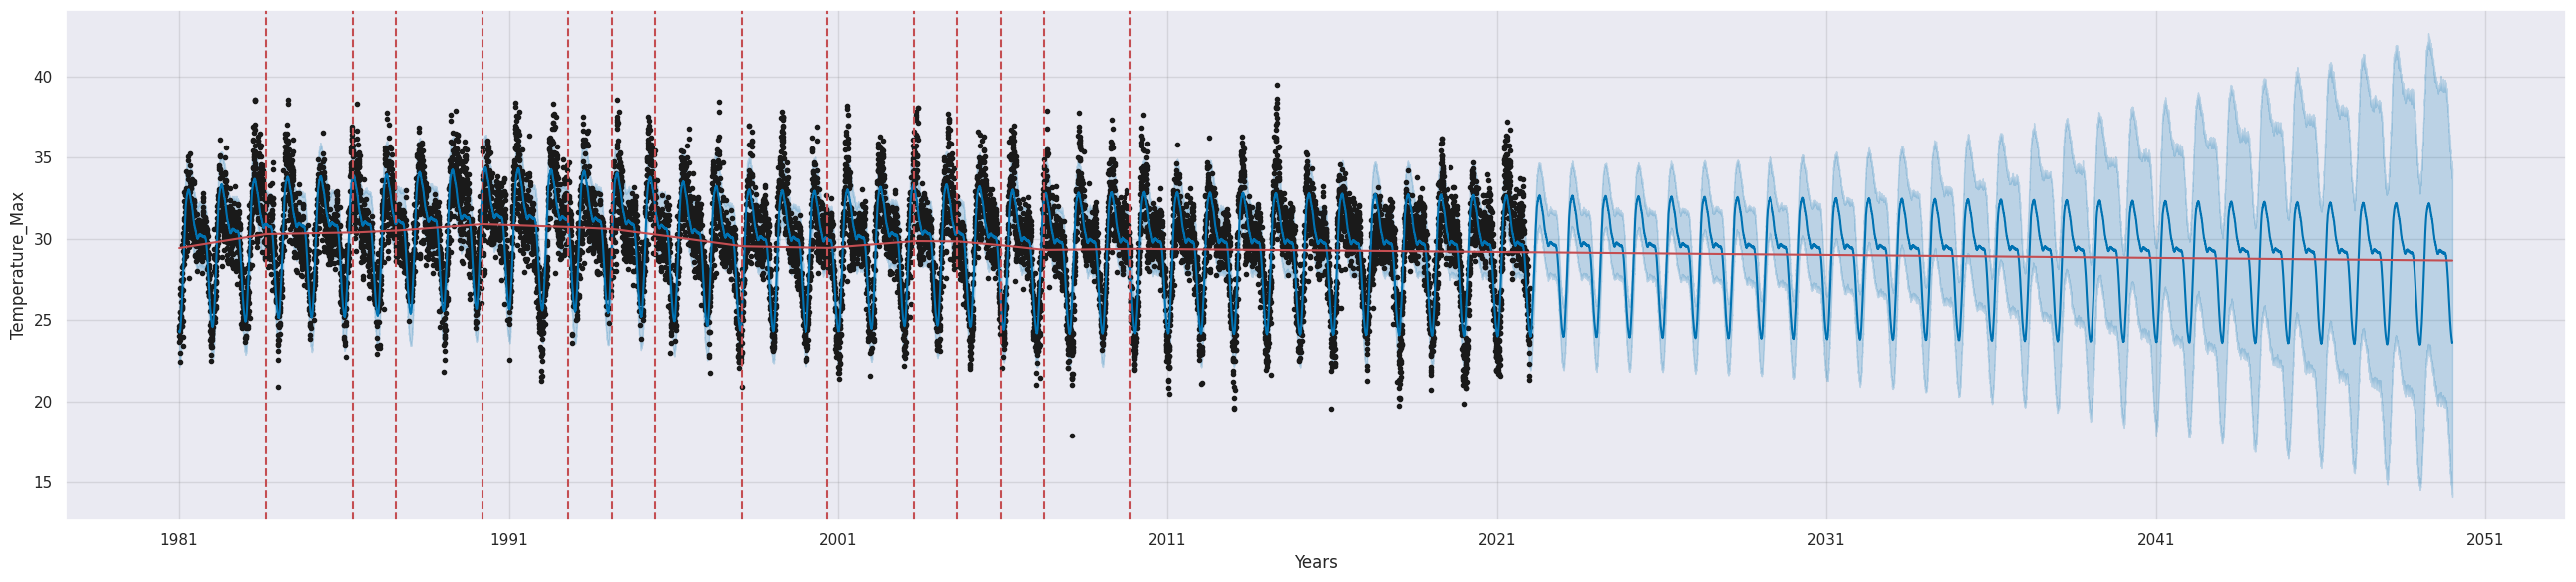

In [ ]:
fig = model2.plot(forecast,figsize=(26, 6))
# fig = m.plot(forecast,figsize=(20, 12))
a = add_changepoints_to_plot(fig.gca(), model2, forecast)
plt.xlabel('Years')
plt.ylabel('Temperature_Max')
plt.tight_layout()
plt.show()

> 2.6 Visusalization of Trend, Yearly & Day

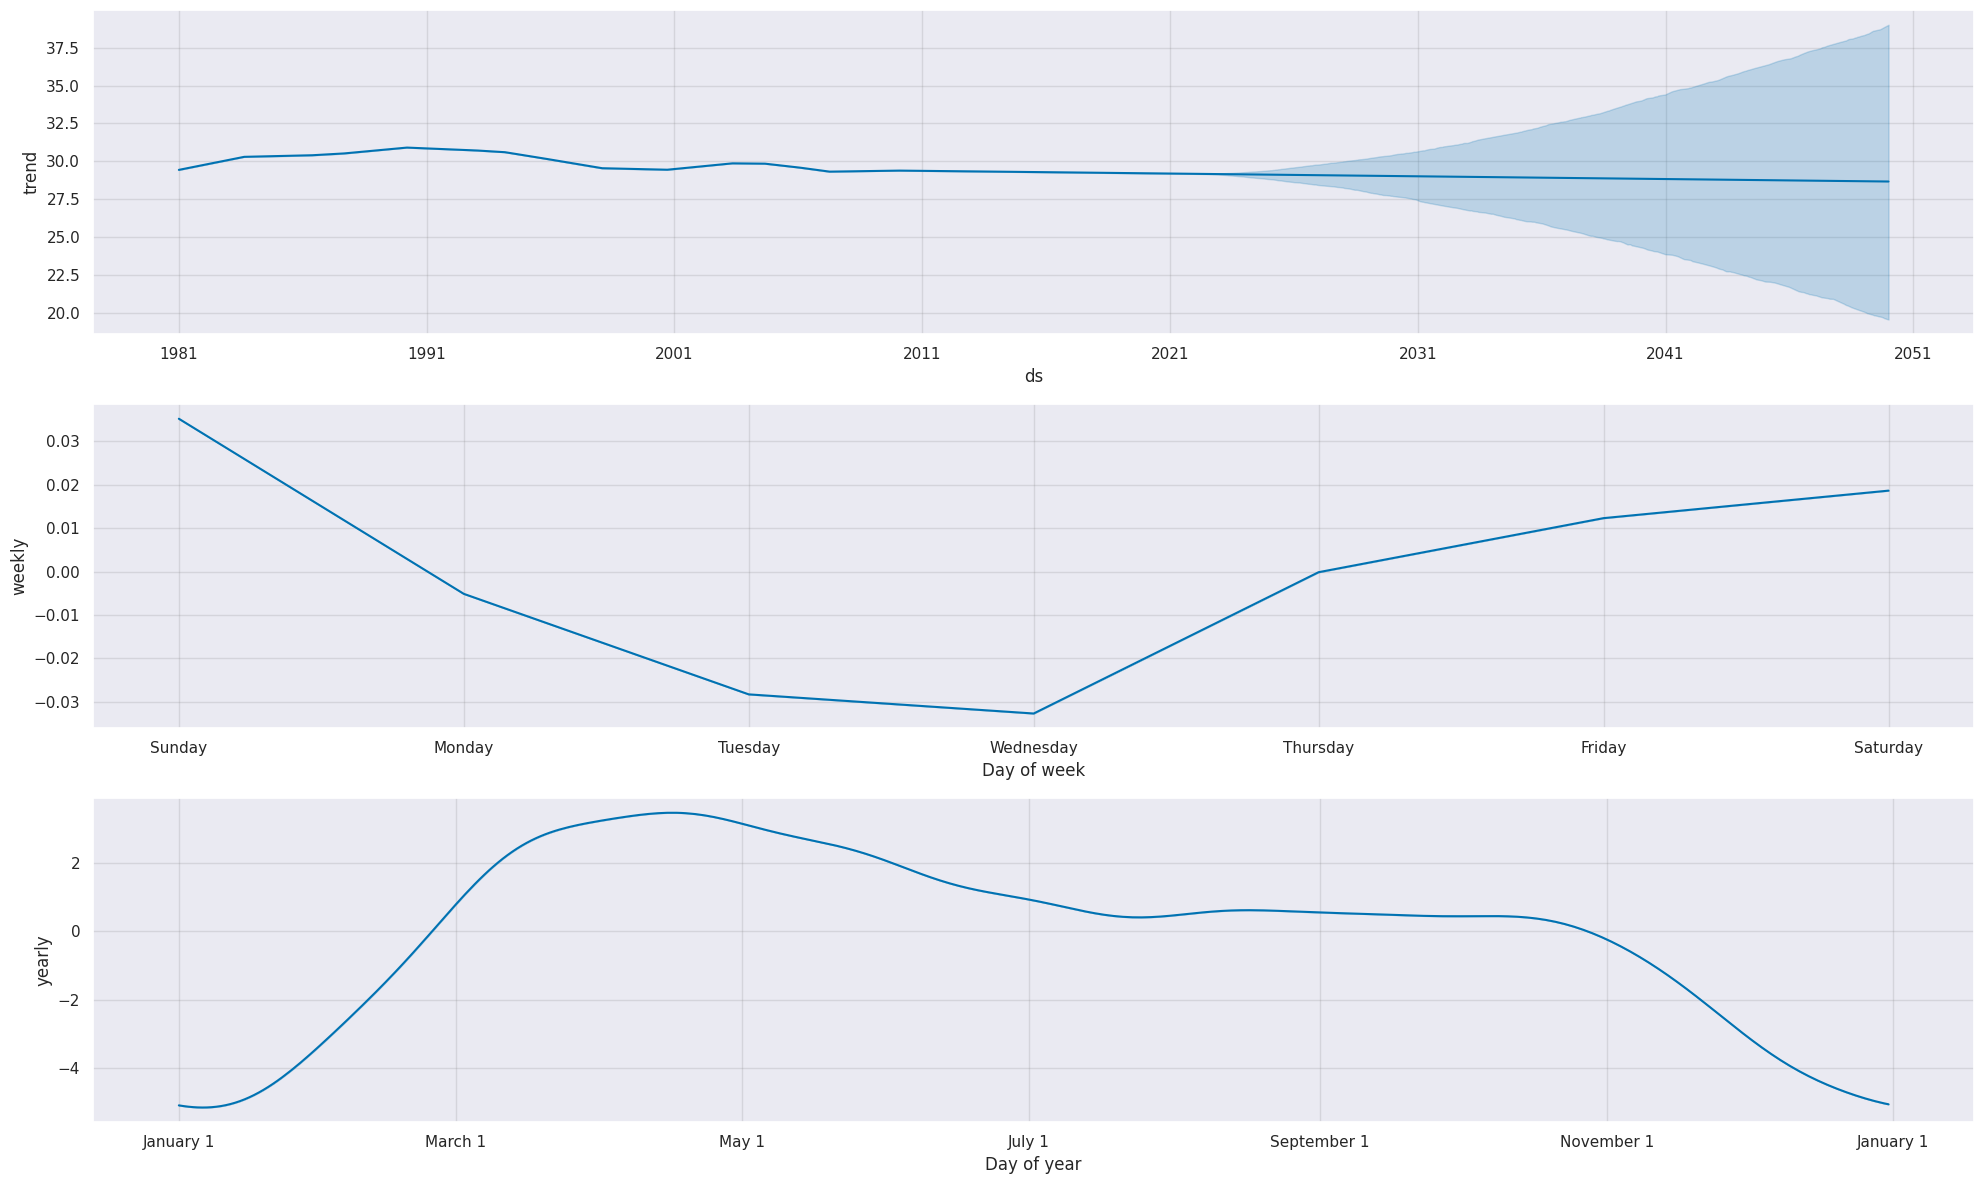

In [ ]:
fig = model2.plot_components(forecast, figsize=(20, 12))

#### 3 **Min Temperature**

> 3.1 Model Creation

In [ ]:
model3 = Prophet()

> 3.2 Data preprocessing

In [ ]:
df_for_temp_min=df[['Date','Temperature_Min']]
df_for_temp_min['Date']=pd.to_datetime(df_for_temp_min['Date'])
df_for_temp_min.rename(columns = {'Date':'ds'}, inplace = True)
df_for_temp_min.rename(columns = {'Temperature_Min':'y'}, inplace = True)
model3.fit(df_for_temp_min)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpm2cymma5/y_yw8_af.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpm2cymma5/vr7nj1a8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=69503', 'data', 'file=/tmp/tmpm2cymma5/y_yw8_af.json', 'init=/tmp/tmpm2cymma5/vr7nj1a8.json', 'output', 'file=/tmp/tmpm2cymma5/prophet_modelfmff2hip/prophet_model-20230430103942.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:39:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:39:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


> 3.3 Generate future Dates

In [ ]:
# 2022 - 2050 : 10226 days
future = model3.make_future_dataframe(periods = days)
future.tail(5)

ds
25197 2049-12-27
25198 2049-12-28
25199 2049-12-29
25200 2049-12-30
25201 2049-12-31

> 3.4 predict future Humidity

In [ ]:
forecast = model3.predict(future)
predicted_data['Min_Temp'] = forecast['yhat']
# forecast = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds       yhat  yhat_lower  yhat_upper
25197 2049-12-27  14.908610   11.656335   18.029980
25198 2049-12-28  14.831130   11.771683   18.057295
25199 2049-12-29  14.758401   11.349283   17.922569
25200 2049-12-30  14.659438   11.343909   17.848161
25201 2049-12-31  14.589017   11.283793   17.638710

> 3.5 Visusalization (past and future)

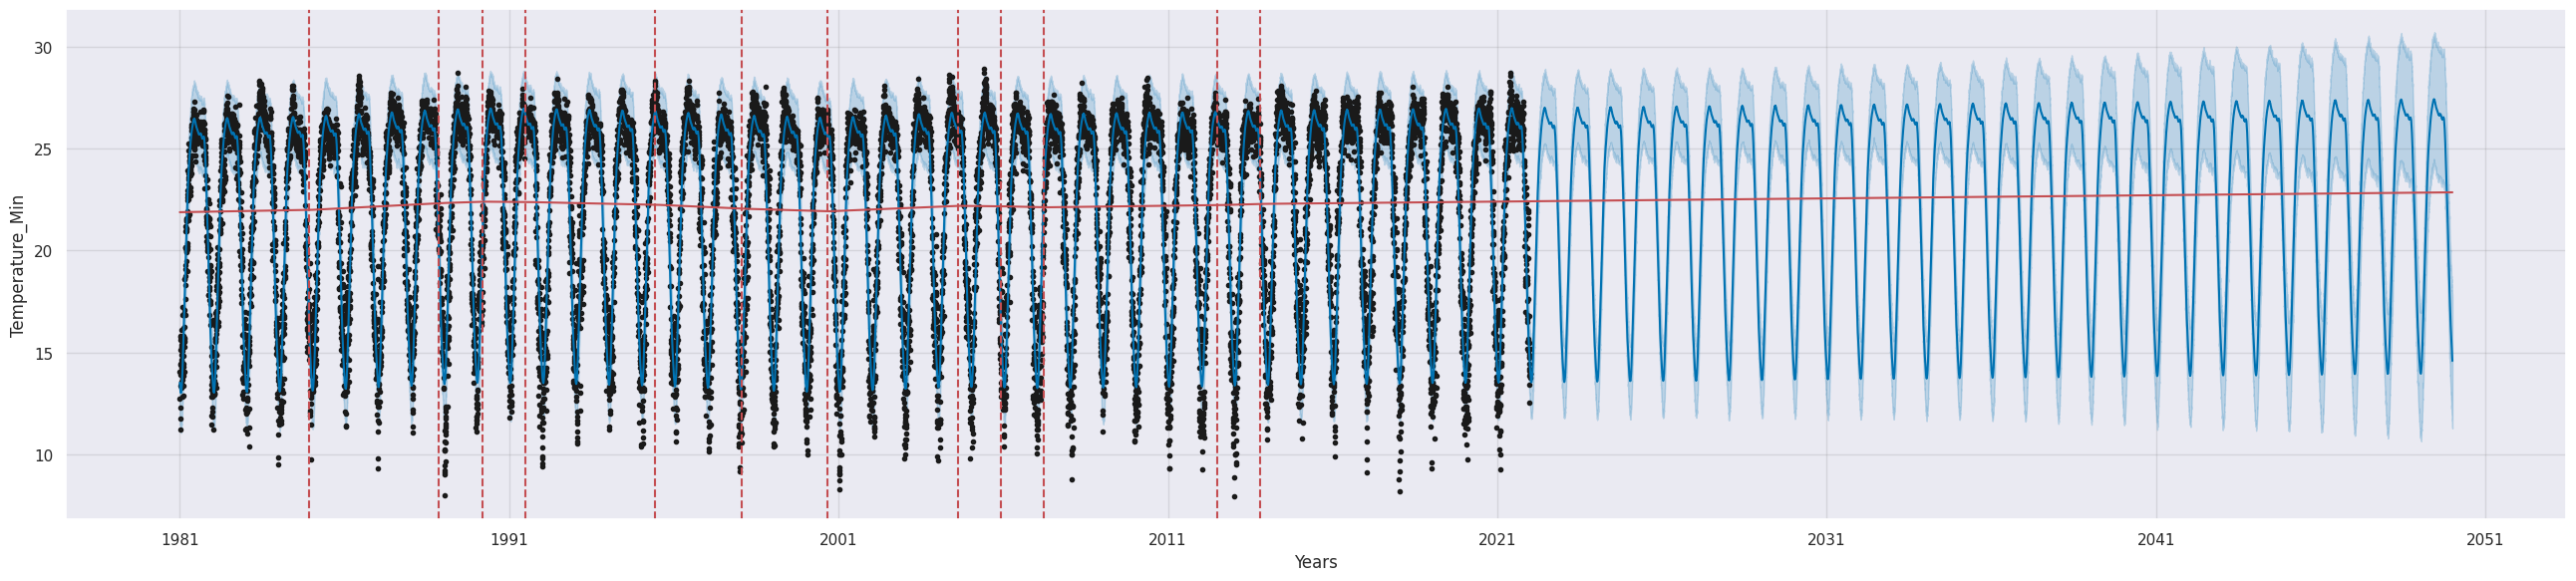

In [ ]:
fig = model3.plot(forecast,figsize=(26, 6))
# fig = m.plot(forecast,figsize=(20, 12))
a = add_changepoints_to_plot(fig.gca(), model3, forecast)
plt.xlabel('Years')
plt.ylabel('Temperature_Min')
plt.tight_layout()
plt.show()

> 3.6 Visusalization of Trend, Yearly & Day

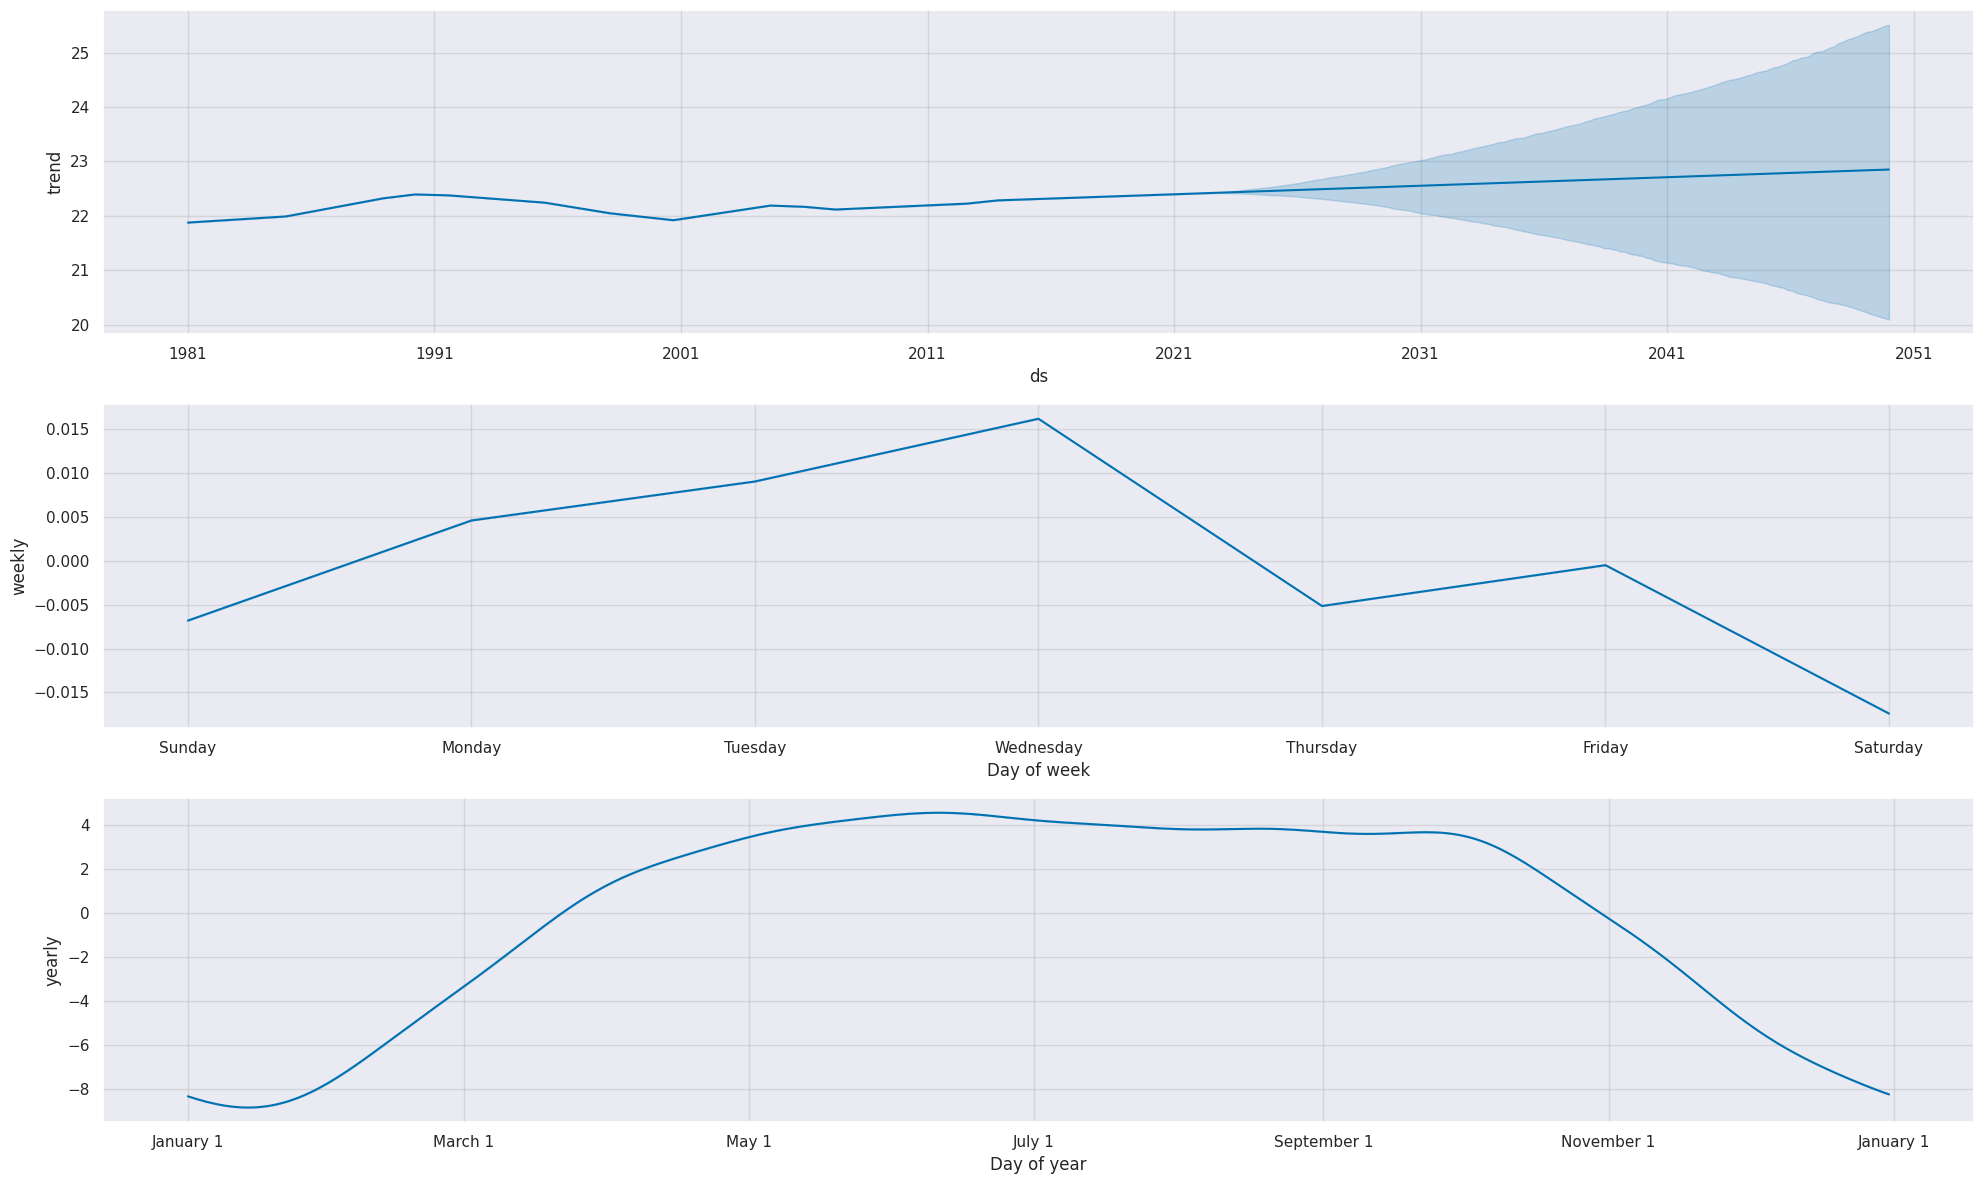

In [ ]:
fig = model3.plot_components(forecast, figsize=(20, 12))

#### 4 **Precipitation**

> 4.1 Model Creation

In [ ]:
model4 = Prophet()

> 4.2 Data preprocessing

In [ ]:
df_for_rain=df[['Date','Precipitation']]
df_for_rain['Date']=pd.to_datetime(df_for_rain['Date'])
df_for_rain.rename(columns = {'Date':'ds'}, inplace = True)
df_for_rain.rename(columns = {'Precipitation':'y'}, inplace = True)
model4.fit(df_for_rain)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpm2cymma5/v3at5d50.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpm2cymma5/01a80py5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=78301', 'data', 'file=/tmp/tmpm2cymma5/v3at5d50.json', 'init=/tmp/tmpm2cymma5/01a80py5.json', 'output', 'file=/tmp/tmpm2cymma5/prophet_model63qegr3b/prophet_model-20230430103956.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:39:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:39:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


> 4.3 Generate future Dates

In [ ]:
# 2022 - 2050 : 10226 days
future = model4.make_future_dataframe(periods = days)
future.tail(5)

ds
25197 2049-12-27
25198 2049-12-28
25199 2049-12-29
25200 2049-12-30
25201 2049-12-31

> 4.4 predict future Humidity

In [ ]:
forecast = model4.predict(future)
predicted_data['Precipitation'] = forecast['yhat']
# forecast = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds       yhat  yhat_lower  yhat_upper
25197 2049-12-27  27.638269   -2.607206   59.435125
25198 2049-12-28  27.459946   -4.914085   57.401267
25199 2049-12-29  27.193355   -2.228738   58.437898
25200 2049-12-30  27.141381   -2.292756   58.184708
25201 2049-12-31  27.316918   -2.594036   58.879726

> 4.5 Visusalization (past and future)

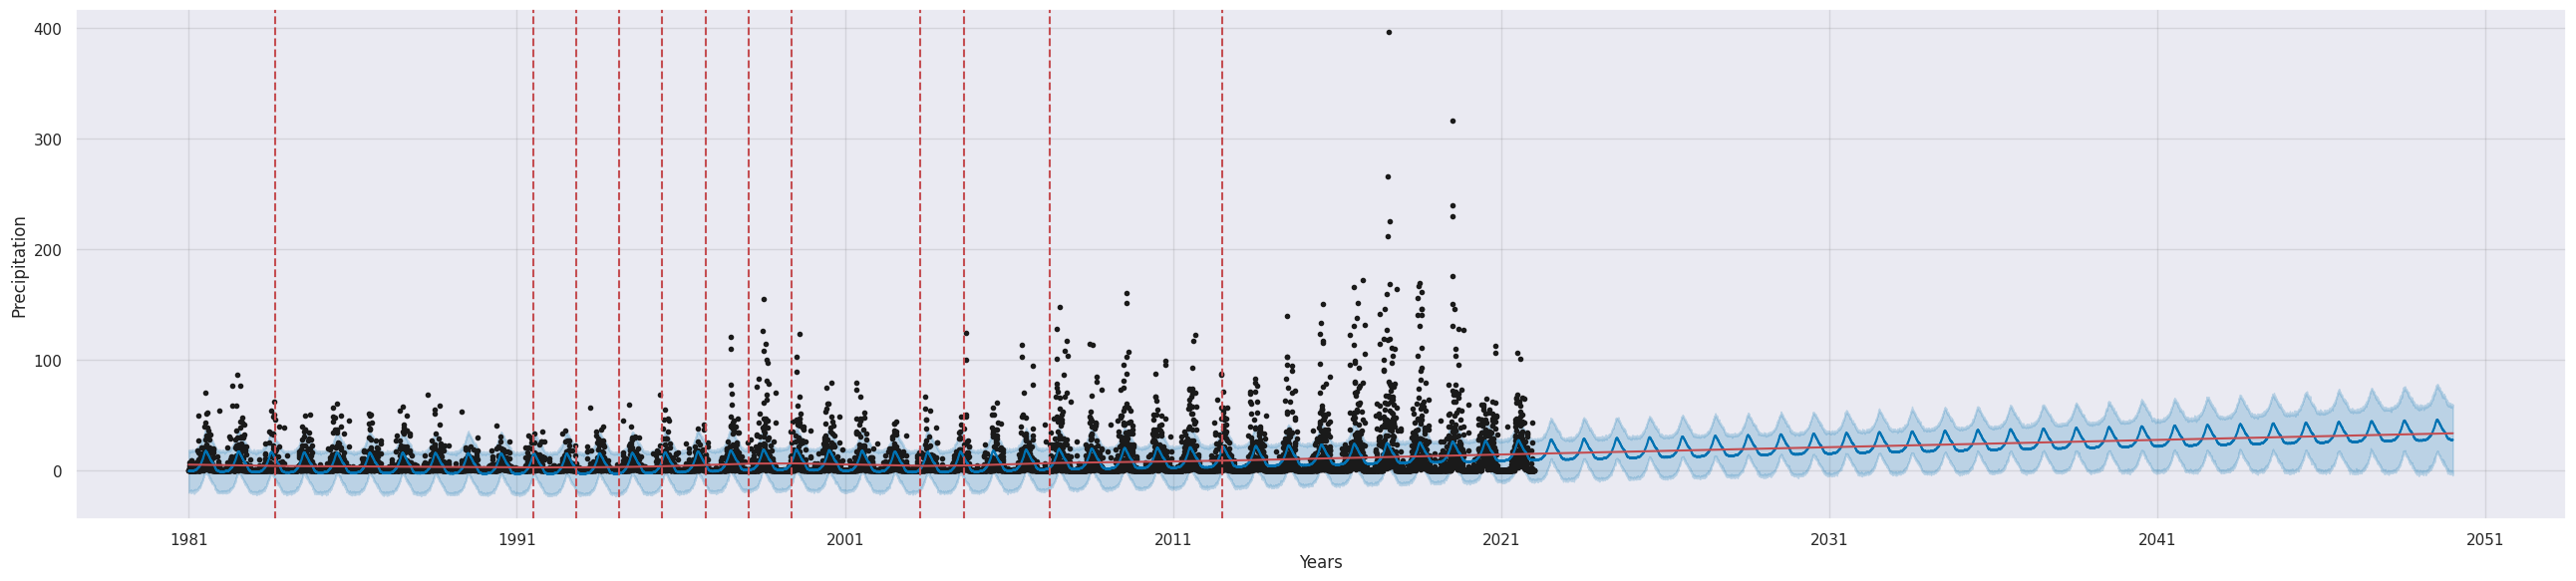

In [ ]:
fig = model4.plot(forecast,figsize=(26, 6))
# fig = m.plot(forecast,figsize=(20, 12))
a = add_changepoints_to_plot(fig.gca(), model4, forecast)
plt.xlabel('Years')
plt.ylabel('Precipitation')
plt.tight_layout()
plt.show()

> 4.6 Visusalization of Trend, Yearly & Day

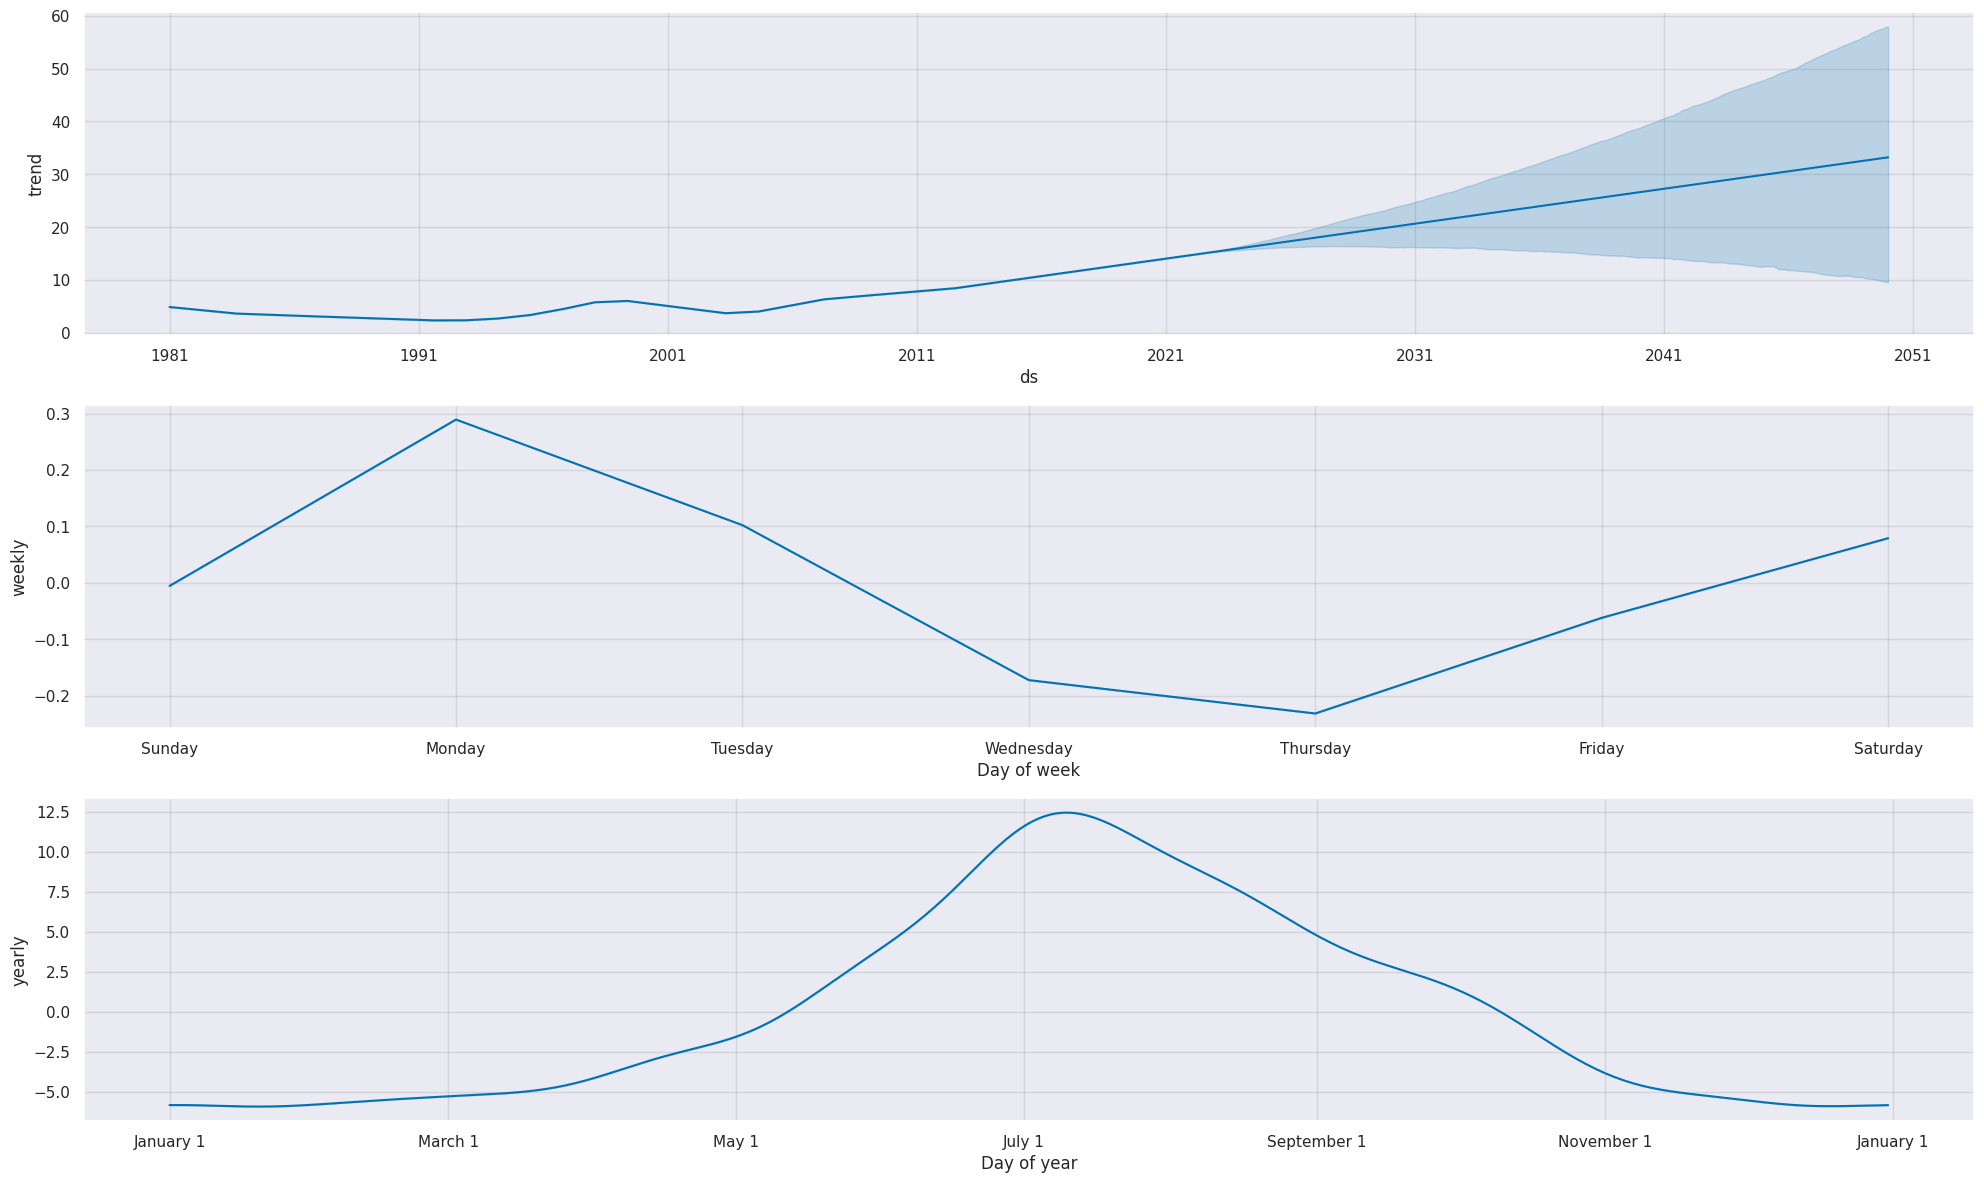

In [ ]:
fig = model4.plot_components(forecast, figsize=(20, 12))

#### 5 **Max Wind Speed**

> 5.1 Model Creation

In [ ]:
model5 = Prophet()

> 5.2 Data preprocessing

In [ ]:
df_for_wind_max = pd.DataFrame()  
df_for_wind_max['ds'] = df['Date']
df_for_wind_max['y'] = df['Wind_Speed_Max']
df_for_wind_max['ds'] = pd.to_datetime(df_for_wind_max['ds'])
model5.fit(df_for_wind_max)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpm2cymma5/ll1d7_qg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpm2cymma5/gy0bzhkt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=21809', 'data', 'file=/tmp/tmpm2cymma5/ll1d7_qg.json', 'init=/tmp/tmpm2cymma5/gy0bzhkt.json', 'output', 'file=/tmp/tmpm2cymma5/prophet_modela3n2uaup/prophet_model-20230430104011.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:40:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:40:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


> 5.3 Generate future Dates

In [ ]:
# 2022 - 2050 : 10226 days
future = model5.make_future_dataframe(periods = days)
future.tail(5)

ds
25197 2049-12-27
25198 2049-12-28
25199 2049-12-29
25200 2049-12-30
25201 2049-12-31

> 5.4 predict future Humidity

In [ ]:
forecast = model5.predict(future)
predicted_data['Max_Wind_Speed'] = forecast['yhat']
# forecast = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds      yhat  yhat_lower  yhat_upper
25197 2049-12-27  2.959237    0.262517    5.663155
25198 2049-12-28  3.007388    0.324806    5.686622
25199 2049-12-29  3.053170    0.454199    5.798759
25200 2049-12-30  2.986701    0.301683    5.607243
25201 2049-12-31  3.012381    0.255082    5.609831

> 5.5 Visusalization (past and future)

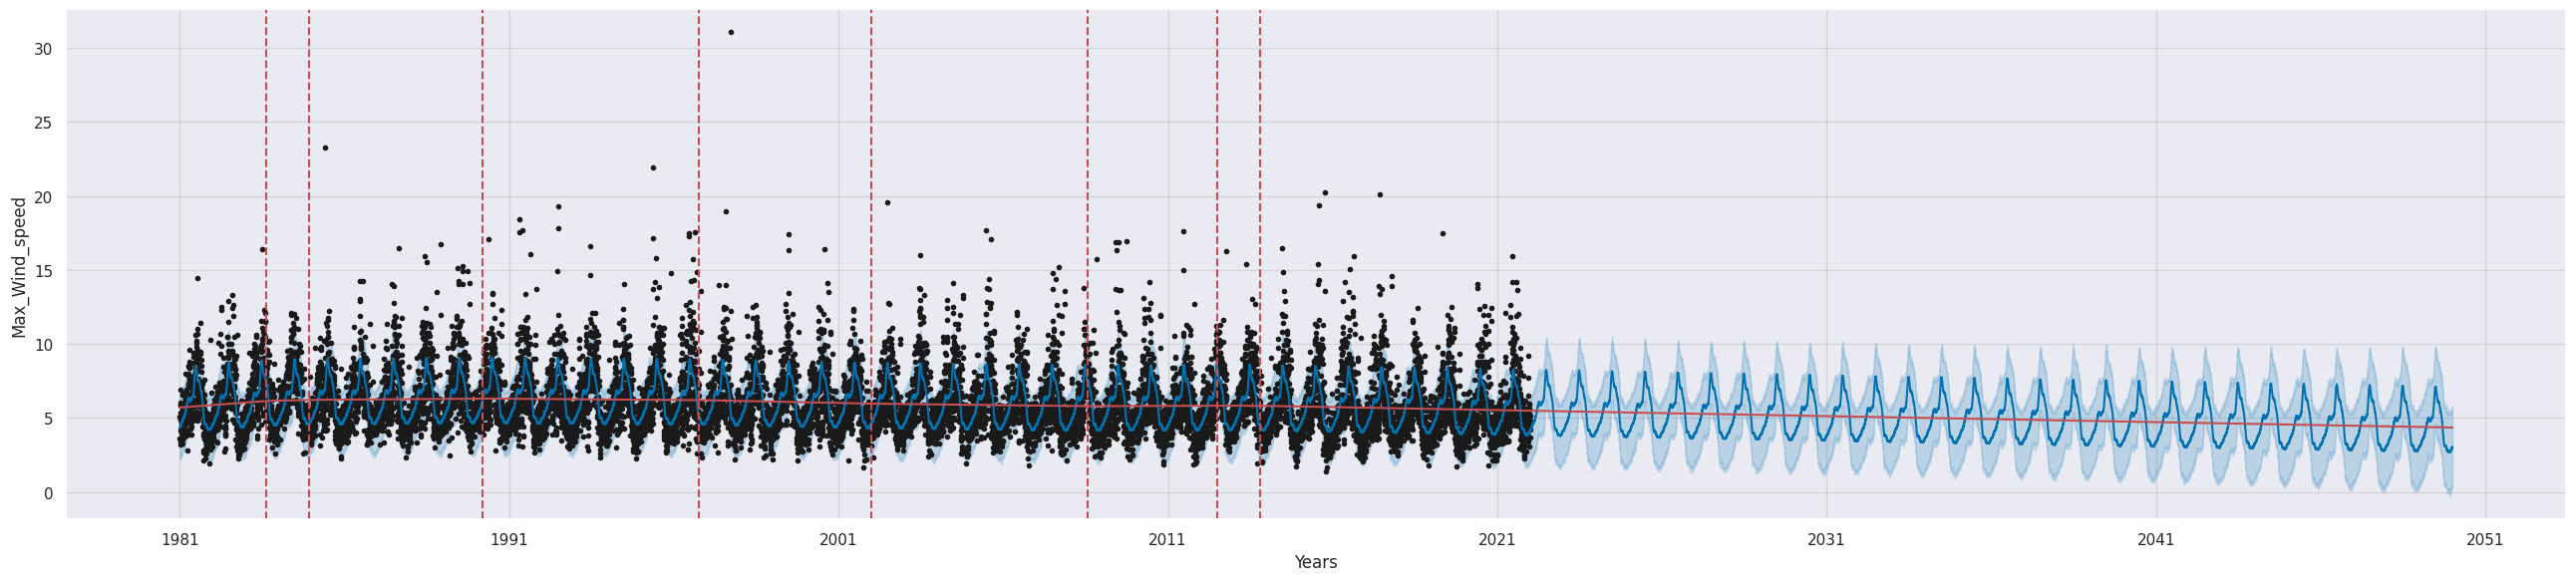

In [ ]:
fig = model5.plot(forecast,figsize=(26, 6))
# fig = m.plot(forecast,figsize=(20, 12))
a = add_changepoints_to_plot(fig.gca(), model5, forecast)
plt.xlabel('Years')
plt.ylabel('Max_Wind_speed')
plt.tight_layout()
plt.show()

> 5.6 Visusalization of Trend, Yearly & Day

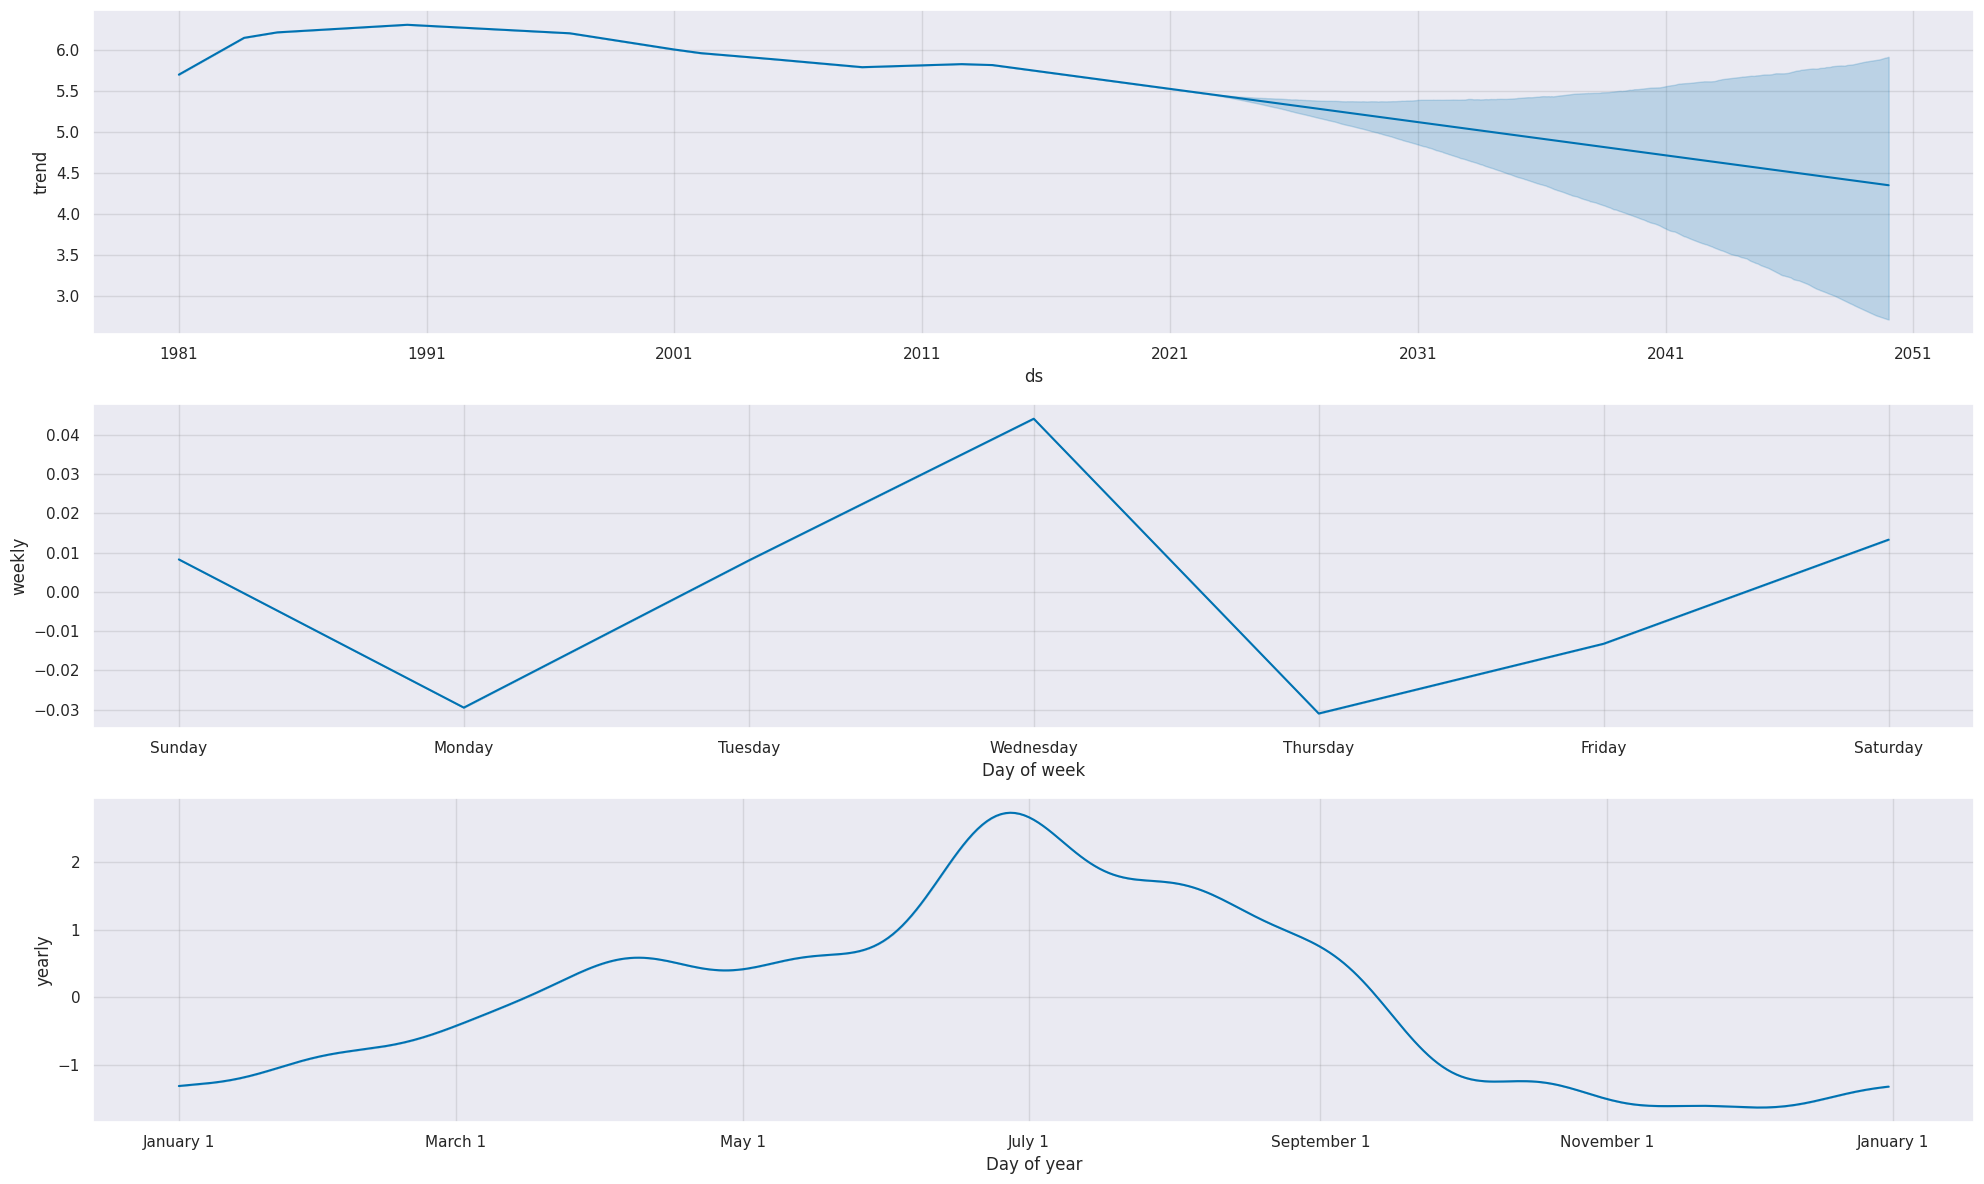

In [ ]:
fig = model5.plot_components(forecast, figsize=(20, 12))

#### 6 **Min Wind Speed**

> 6.1 Model Creation

In [ ]:
model6 = Prophet()

> 6.2 Data preprocessing

In [ ]:
df_for_wind_min = pd.DataFrame()  
df_for_wind_min['ds'] = df['Date']
df_for_wind_min['y'] = df['Wind_Speed_Min']
df_for_wind_min['ds'] = pd.to_datetime(df_for_wind_min['ds'])
model6.fit(df_for_wind_min)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpm2cymma5/5gjyncaw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpm2cymma5/yrab7h8f.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=41764', 'data', 'file=/tmp/tmpm2cymma5/5gjyncaw.json', 'init=/tmp/tmpm2cymma5/yrab7h8f.json', 'output', 'file=/tmp/tmpm2cymma5/prophet_model9r9iszeb/prophet_model-20230430104025.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:40:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:40:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


> 6.3 Generate future Dates

In [ ]:
# 2022 - 2050 : 10226 days
future = model6.make_future_dataframe(periods = days)
future.tail(5)

ds
25197 2049-12-27
25198 2049-12-28
25199 2049-12-29
25200 2049-12-30
25201 2049-12-31

> 6.4 predict future Humidity

In [ ]:
forecast = model6.predict(future)
predicted_data['Min_Wind_Speed'] = forecast['yhat']
# forecast = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds      yhat  yhat_lower  yhat_upper
25197 2049-12-27  0.383389   -1.590336    2.268800
25198 2049-12-28  0.412732   -1.577524    2.467017
25199 2049-12-29  0.443100   -1.700578    2.352263
25200 2049-12-30  0.403558   -1.567158    2.372012
25201 2049-12-31  0.416300   -1.532169    2.435354

> 6.5 Visusalization (past and future)

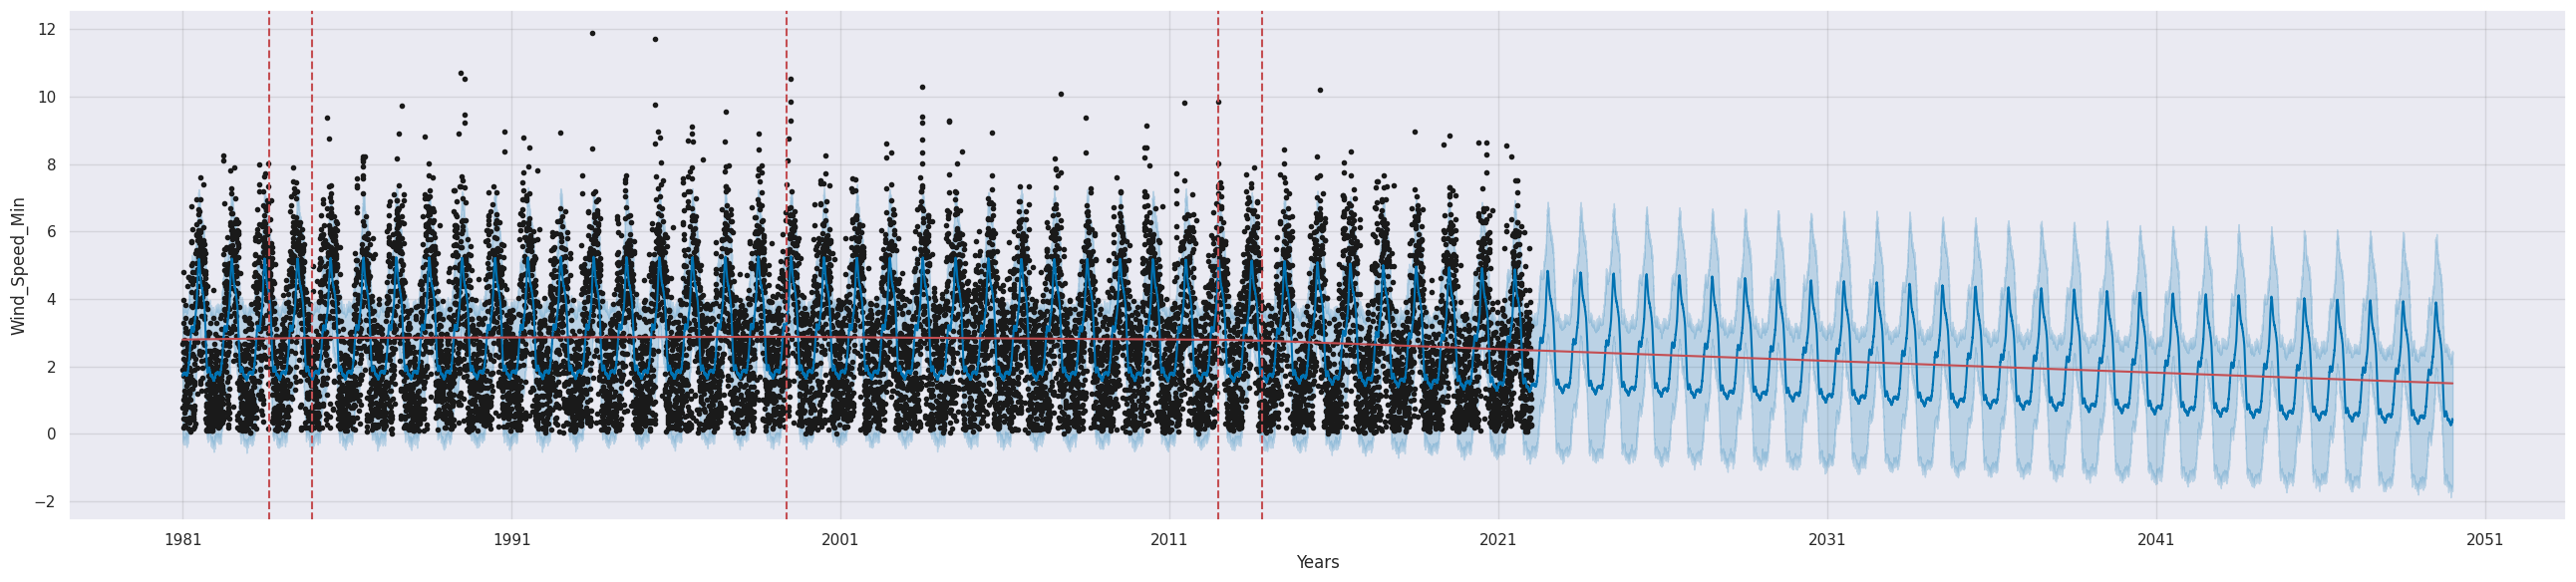

In [ ]:
fig = model6.plot(forecast,figsize=(26, 6))
# fig = m.plot(forecast,figsize=(20, 12))
a = add_changepoints_to_plot(fig.gca(), model6, forecast)
plt.xlabel('Years')
plt.ylabel('Wind_Speed_Min')
plt.tight_layout()
plt.show()

> 6.6 Visusalization of Trend, Yearly & Day

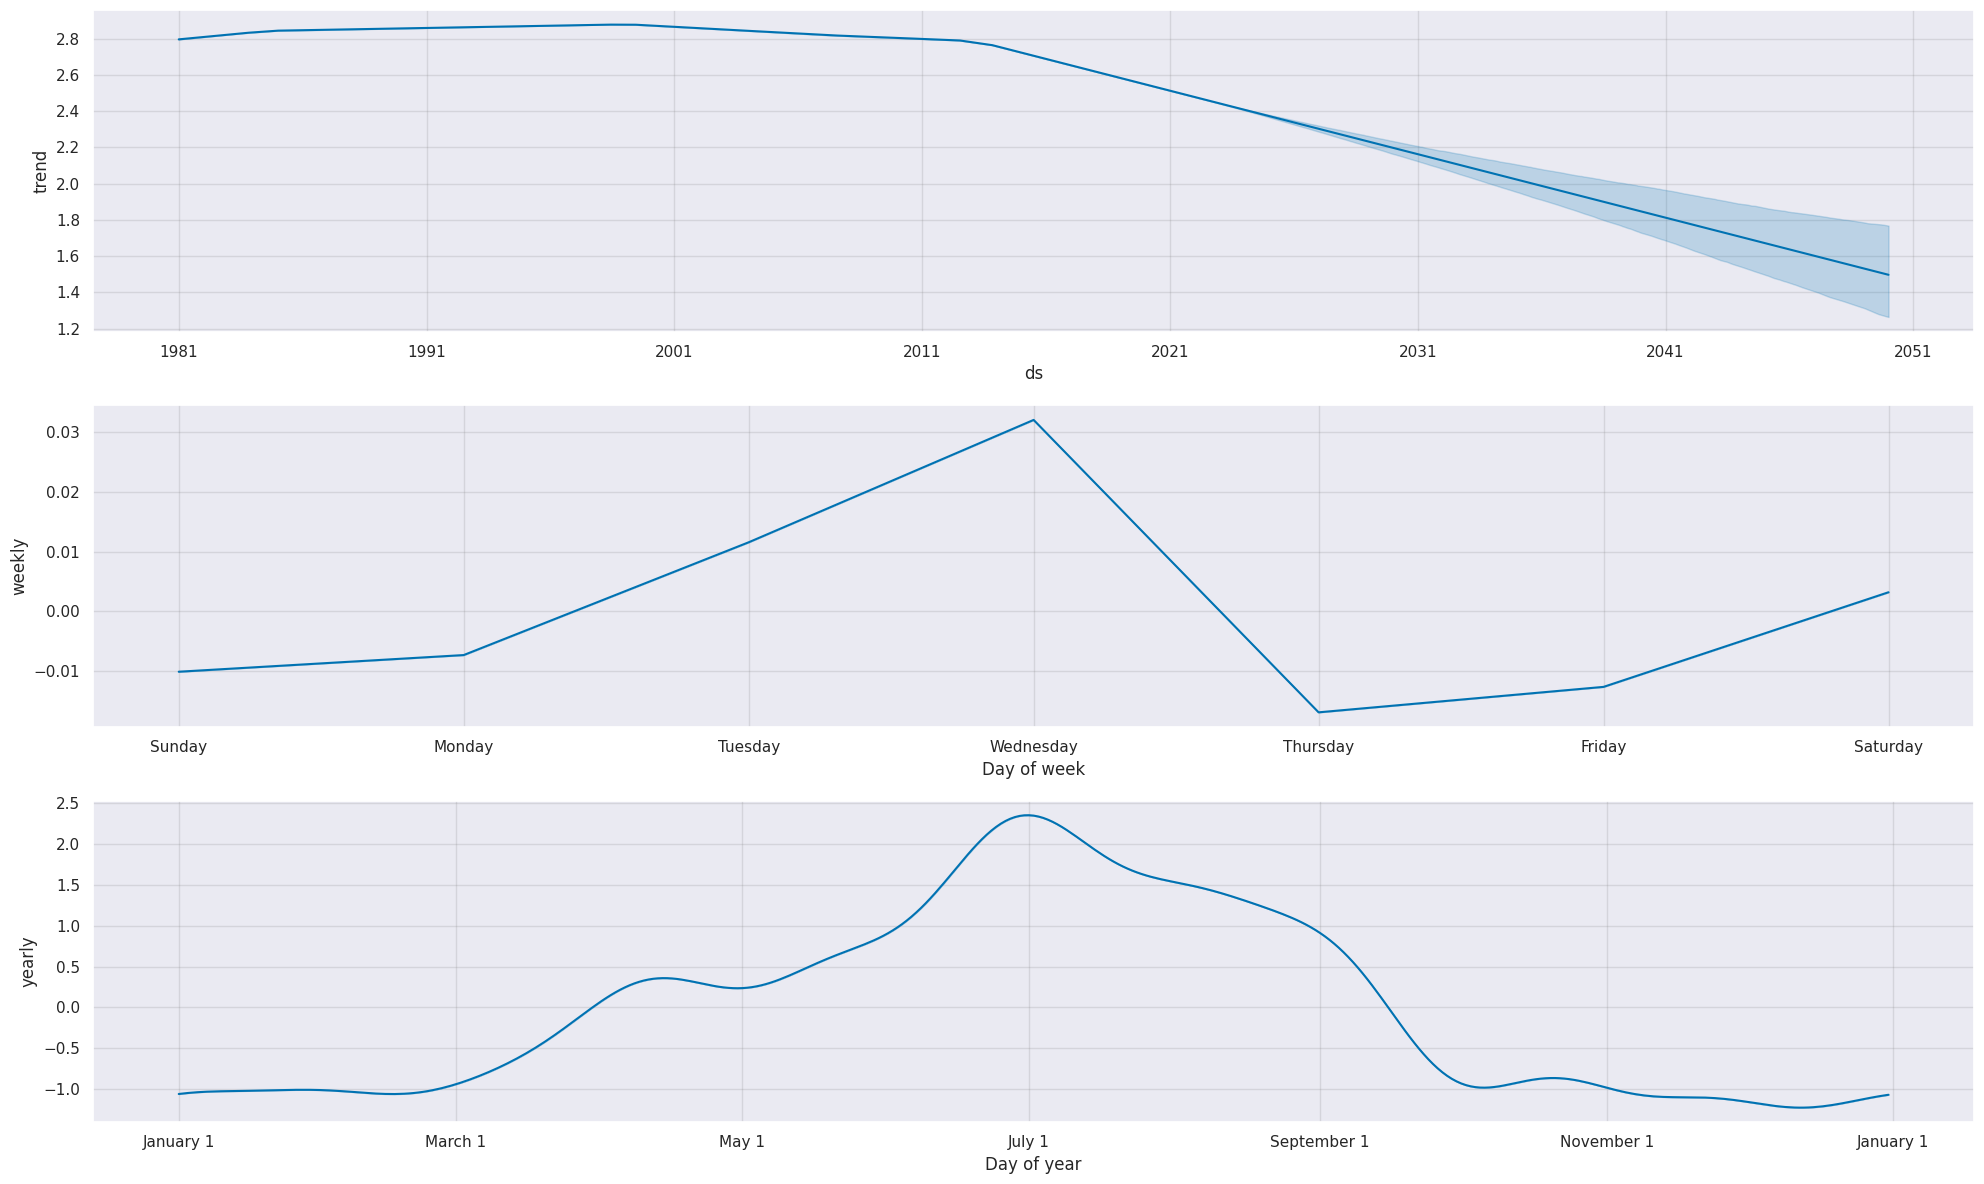

In [ ]:
fig = model6.plot_components(forecast, figsize=(20, 12))

#### 7 **Wind Direction**

> 7.1 Model Creation

In [ ]:
model7 = Prophet()

> 7.2 Data preprocessing

In [ ]:
df_for_wind_dir = pd.DataFrame()  
df_for_wind_dir['ds'] = df['Date']
df_for_wind_dir['y'] = df['Wind_DIrection']
df_for_wind_dir['ds'] = pd.to_datetime(df_for_wind_dir['ds'])
model7.fit(df_for_wind_dir)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpm2cymma5/tovl8lm7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpm2cymma5/tt6wt11u.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=94901', 'data', 'file=/tmp/tmpm2cymma5/tovl8lm7.json', 'init=/tmp/tmpm2cymma5/tt6wt11u.json', 'output', 'file=/tmp/tmpm2cymma5/prophet_model_oclkypg/prophet_model-20230430104133.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:41:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:41:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


> 7.3 Generate future Dates

In [ ]:
# 2022 - 2050 : 10226 days
future = model7.make_future_dataframe(periods = days)
future.tail(5)

ds
25197 2049-12-27
25198 2049-12-28
25199 2049-12-29
25200 2049-12-30
25201 2049-12-31

> 7.4 predict future Humidity

In [ ]:
forecast = model7.predict(future)
predicted_data['Wind_DIrection'] = forecast['yhat']
# forecast = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds        yhat  yhat_lower  yhat_upper
25197 2049-12-27  159.895311  112.086393  205.944560
25198 2049-12-28  160.630913  109.770232  208.857672
25199 2049-12-29  160.353173  108.331144  206.503583
25200 2049-12-30  161.495221  111.667174  208.264515
25201 2049-12-31  162.016090  110.089236  209.585128

> 7.5 Visusalization (past and future)

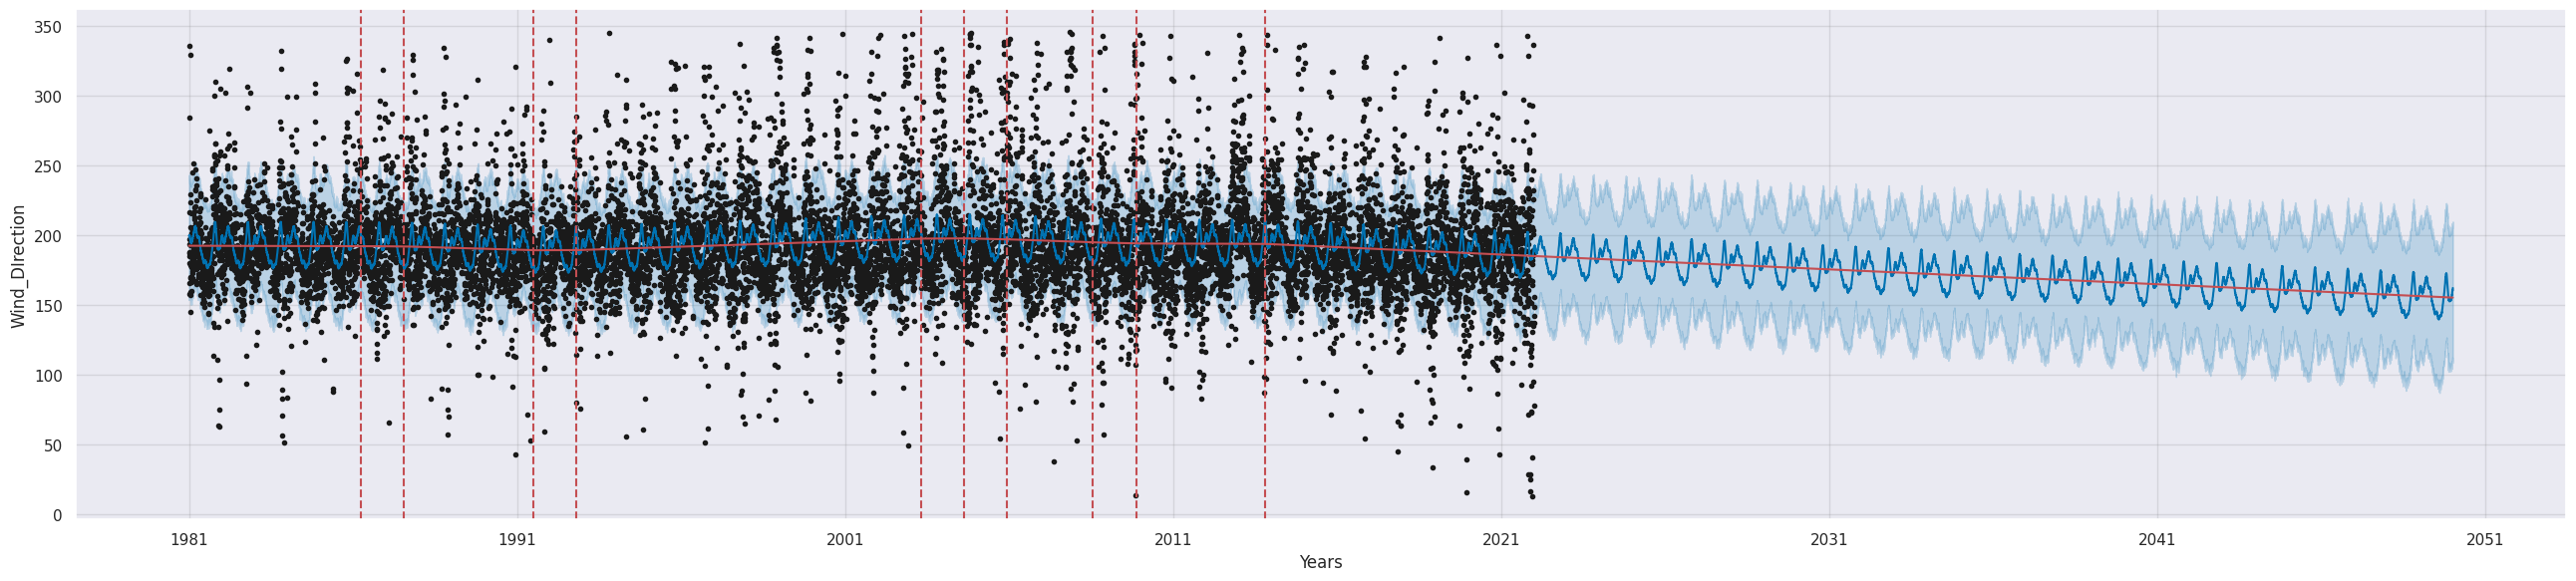

In [ ]:
fig = model7.plot(forecast,figsize=(26, 6))
# fig = m.plot(forecast,figsize=(20, 12))
a = add_changepoints_to_plot(fig.gca(), model7, forecast)
plt.xlabel('Years')
plt.ylabel('Wind_DIrection')
plt.tight_layout()
plt.show()

> 7.6 Visusalization using barchart

In [ ]:
fig = go.Figure()
WINdIR = ['East(E)', 'ENE', 'NE', 'NNE', 'North(N)', 'NNW', 'NW', 'WNW', 'West(W)', 'WSW', 'SW', 'SSW', 'South(S)', 'SSE', 'SE', 'ESE']
             
fig.add_trace(go.Barpolar(r = df.groupby('Wind_Speed_Range')['Wind_DIrection'].mean(),
                          theta=WINdIR,
                          name='Wind_DIrection',
                        #   fill='tonext',
                          )
             )
fig.update_layout(polar=dict(radialaxis=dict(visible=False)),
                  showlegend=True,
                  title='Wind_DIrection',
                  titlefont={'size': 22, 'family':'Serif'},
                #   template='plotly_dark',
                #   paper_bgcolor='lightgray',
                  width=800, height=500,
                 )
fig.show()

## Predicted Data Samples

In [ ]:
predicted_data.iloc[-10227:,:]

Date   Humidity   Max_Temp   Min_Temp  Precipitation  \
14975 2022-01-01   9.965160  24.102555  14.060770       8.971875   
14976 2022-01-02   9.918738  24.096954  14.002247       8.890838   
14977 2022-01-03   9.867589  24.038310  13.948009       9.187643   
14978 2022-01-04   9.810420  24.001085  13.890615       9.001218   
14979 2022-01-05   9.763768  23.987178  13.840103       8.725765   
...          ...        ...        ...        ...            ...   
25197 2049-12-27  11.779307  23.729710  14.908610      27.638269   
25198 2049-12-28  11.715310  23.669198  14.831130      27.459946   
25199 2049-12-29  11.661228  23.630000  14.758401      27.193355   
25200 2049-12-30  11.584426  23.630551  14.659438      27.141381   
25201 2049-12-31  11.528153  23.613990  14.589017      27.316918   

       Max_Wind_Speed  Min_Wind_Speed  Wind_DIrection  
14975        4.181997        1.420803      191.962619  
14976        4.183605        1.414356      191.922198  
14977        4.152106        1.423094      191.812179  
14978        4.195755        1.447029      192.203788  
14979        4.238055        1.471762      191.555268  
...               ...             ...             ...  
25197        2.959237        0.383389      159.895311  
25198        3.007388        0.412732      160.630913  
25199        3.053170        0.443100      160.353173  
25200        2.986701        0.403558      161.495221  
25201        3.012381        0.416300      162.016090  

[10227 rows x 8 columns]

## Clustering

In [ ]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


### Data Preprocessing

In [ ]:
dfc = pd.read_excel('Weather_data.xlsx')
dfc.head()

Year  Month  Day  Temperature_Max  Temperature_Min  Precipitation  \
0  1981      1    1            24.68            12.73            0.0   
1  1981      1    2            24.05            14.08            0.0   
2  1981      1    3            23.69            13.35            0.0   
3  1981      1    4            24.32            13.90            0.0   
4  1981      1    5            24.44            14.44            0.0   

   Humidity  Wind_Speed_Max  Wind_Speed_Min  Wind_Speed_Range  Wind_DIrection  
0      8.48            5.12            2.68              2.45          179.69  
1      7.81            3.63            1.89              1.75          187.94  
2      7.81            3.38            0.77              2.61          184.81  
3      7.81            3.23            0.44              2.80          193.38  
4      9.52            3.53            1.01              2.53          187.00

In [ ]:
dfc.drop(dfc.columns[[0, 1, 2, 7, 8, 10]], axis=1, inplace=True)
dfc = dfc.dropna()
dfc.head()

Temperature_Max  Temperature_Min  Precipitation  Humidity  Wind_Speed_Range
0            24.68            12.73            0.0      8.48              2.45
1            24.05            14.08            0.0      7.81              1.75
2            23.69            13.35            0.0      7.81              2.61
3            24.32            13.90            0.0      7.81              2.80
4            24.44            14.44            0.0      9.52              2.53

In [ ]:
scaler = StandardScaler()
dfc_scaled = scaler.fit_transform(dfc)

In [ ]:
X_train, X_test = train_test_split(dfc_scaled, test_size = 0.25, random_state = 42)

### K Means Clustering

In [ ]:
kmeans = KMeans(n_clusters = 3, random_state = 42)
kmeans.fit(X_train)

KMeans(n_clusters=3, random_state=42)

In [ ]:
y_kmeans = kmeans.predict(X_test)

In [ ]:
dfc_test = pd.DataFrame(X_test, columns = dfc.columns)
dfc_test['Cluster'] = y_kmeans
dfc_clusters = dfc_test.groupby('Cluster').mean()

#### Prediction Evaluation

In [ ]:
y_pred_kmeans = dfc_test['Cluster'].map(dfc_clusters['Precipitation'])
mse_kmeans = mean_squared_error(dfc_test['Precipitation'], y_pred_kmeans)
print("Mean Squared Error for K-Means clustering:", mse_kmeans)

Mean Squared Error for K-Means clustering: 0.2728409718503553


### Hierarchical Clustering (Agglomerative)

In [ ]:
hc = AgglomerativeClustering(n_clusters = 3, linkage = 'ward')
hc.fit(X_train)

AgglomerativeClustering(n_clusters=3)

In [ ]:
y_hc = hc.fit_predict(X_test)

In [ ]:
dfc_test['Cluster'] = y_hc
dfc_clusters = dfc_test.groupby('Cluster').mean()

#### Prediction Evaluation

In [ ]:
y_pred_hc = dfc_test['Cluster'].map(dfc_clusters['Precipitation'])
mse_hc = mean_squared_error(dfc_test['Precipitation'], y_pred_hc)
print("Mean Squared Error for Hierarchical clustering:", mse_hc)

Mean Squared Error for Hierarchical clustering: 0.7221435041375579


### Visualising

## Market Basket Analysis

In [ ]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

features = ['Temperature_Max', 'Temperature_Min', 'Precipitation', 'Humidity', 'Wind_Speed_Max', 'Wind_Speed_Min', 'Wind_Speed_Range', 'Wind_DIrection']
data = df[features]

te = TransactionEncoder()
te_data = te.fit(data.values).transform(data.values)
df_encoded = pd.DataFrame(te_data, columns=te.columns_)
frequent_itemsets = apriori(df_encoded, min_support=0.05, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)
print(rules)


Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, leverage, conviction]
Index: []


## Collaborative Filtering

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

features = ['Temperature_Max', 'Temperature_Min', 'Precipitation', 'Humidity', 'Wind_Speed_Max', 'Wind_Speed_Min', 'Wind_Speed_Range', 'Wind_DIrection']


def similarity(x, y):
    x = np.array(x[features]).reshape(1, -1)
    y = np.array(y[features]).reshape(1, -1)
    return cosine_similarity(x, y)[0][0]


def recommend_weather(df, target_weather, k=5):
    similarities = df.apply(lambda x: similarity(x, target_weather), axis=1)
    similar_weather = df.iloc[similarities.nlargest(k).index]
    return similar_weather[features].mean()


target_weather = df.iloc[0]  #Recommend weather
recommended_weather = recommend_weather(df, target_weather)
print(recommended_weather) # finding a close by weather condition for our specified weather condition


Temperature_Max      24.182
Temperature_Min      12.330
Precipitation         0.000
Humidity              8.508
Wind_Speed_Max        5.104
Wind_Speed_Min        2.464
Wind_Speed_Range      2.640
Wind_DIrection      174.836
dtype: float64


In [ ]:
df = pd.read_excel('Weather_data.xlsx')

## Classification

In [ ]:
df['Precipitation_Encoded'] = df['Precipitation'].apply(lambda x: 1 if x > 0 else 0)
df_class=df.drop(['Precipitation'],axis=1)
df.drop(['Precipitation_Encoded'],axis=1,inplace = True)

print(df_class.head())

   Year  Month  Day  Temperature_Max  Temperature_Min  Humidity  \
0  1981      1    1            24.68            12.73      8.48   
1  1981      1    2            24.05            14.08      7.81   
2  1981      1    3            23.69            13.35      7.81   
3  1981      1    4            24.32            13.90      7.81   
4  1981      1    5            24.44            14.44      9.52   

   Wind_Speed_Max  Wind_Speed_Min  Wind_Speed_Range  Wind_DIrection  \
0            5.12            2.68              2.45          179.69   
1            3.63            1.89              1.75          187.94   
2            3.38            0.77              2.61          184.81   
3            3.23            0.44              2.80          193.38   
4            3.53            1.01              2.53          187.00   

   Precipitation_Encoded  
0                      0  
1                      0  
2                      0  
3                      0  
4                      0  


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf



train_data, test_data = train_test_split(df_class, test_size=0.2)


X_train = train_data.drop(['Precipitation_Encoded'], axis=1).values
y_train = train_data['Precipitation_Encoded'].values
X_test = test_data.drop(['Precipitation_Encoded'], axis=1).values
y_test = test_data['Precipitation_Encoded'].values


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

loss, accuracy = model.evaluate(X_test, y_test)
print('Test accuracy: {:.2f}%'.format(accuracy * 100))


Epoch 1/50
300/300 [==============================] - 2s 3ms/step - loss: 0.3419 - accuracy: 0.8555 - val_loss: 0.2868 - val_accuracy: 0.8715
Epoch 2/50
300/300 [==============================] - 1s 2ms/step - loss: 0.2724 - accuracy: 0.8876 - val_loss: 0.2788 - val_accuracy: 0.8777
Epoch 3/50
300/300 [==============================] - 1s 2ms/step - loss: 0.2657 - accuracy: 0.8899 - val_loss: 0.2766 - val_accuracy: 0.8777
Epoch 4/50
300/300 [==============================] - 1s 2ms/step - loss: 0.2621 - accuracy: 0.8910 - val_loss: 0.2750 - val_accuracy: 0.8852
Epoch 5/50
300/300 [==============================] - 1s 2ms/step - loss: 0.2601 - accuracy: 0.8923 - val_loss: 0.2727 - val_accuracy: 0.8827
Epoch 6/50
300/300 [==============================] - 1s 2ms/step - loss: 0.2580 - accuracy: 0.8931 - val_loss: 0.2743 - val_accuracy: 0.8840
Epoch 7/50
300/300 [==============================] - 1s 2ms/step - loss: 0.2570 - accuracy: 0.8940 - val_loss: 0.2677 - val_accuracy: 0.8907
Epoch 

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr = LogisticRegression()


lr.fit(X_train, y_train)


y_pred = lr.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8808013355592654


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score



dtc = DecisionTreeClassifier(random_state=42)

dtc.fit(X_train, y_train)

y_pred = dtc.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8367278797996661


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

rfc = RandomForestClassifier(n_estimators=100)

rfc.fit(X_train, y_train)


y_pred = rfc.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.887813021702838


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix



X = df_class[['Temperature_Max', 'Temperature_Min', 'Humidity', 'Wind_Speed_Max', 'Wind_Speed_Min', 'Wind_Speed_Range', 'Wind_DIrection']]


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

y = df_class['Precipitation_Encoded']


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


knn = KNeighborsClassifier(n_neighbors=5)


knn.fit(X_train, y_train)


accuracy = knn.score(X_test, y_test)
print('Accuracy:', accuracy)

y_pred = knn.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)

Accuracy: 0.8671266414422435
[[1523  259]
 [ 338 2373]]
